# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Выведем общую информацию о датафрейме

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('C:/Users/daria/Датасеты для проектов/03 Исследовательский анализ данных - исследование объявлений о продаже квартир/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Построим гистограммы для каждого столбца датафрейма

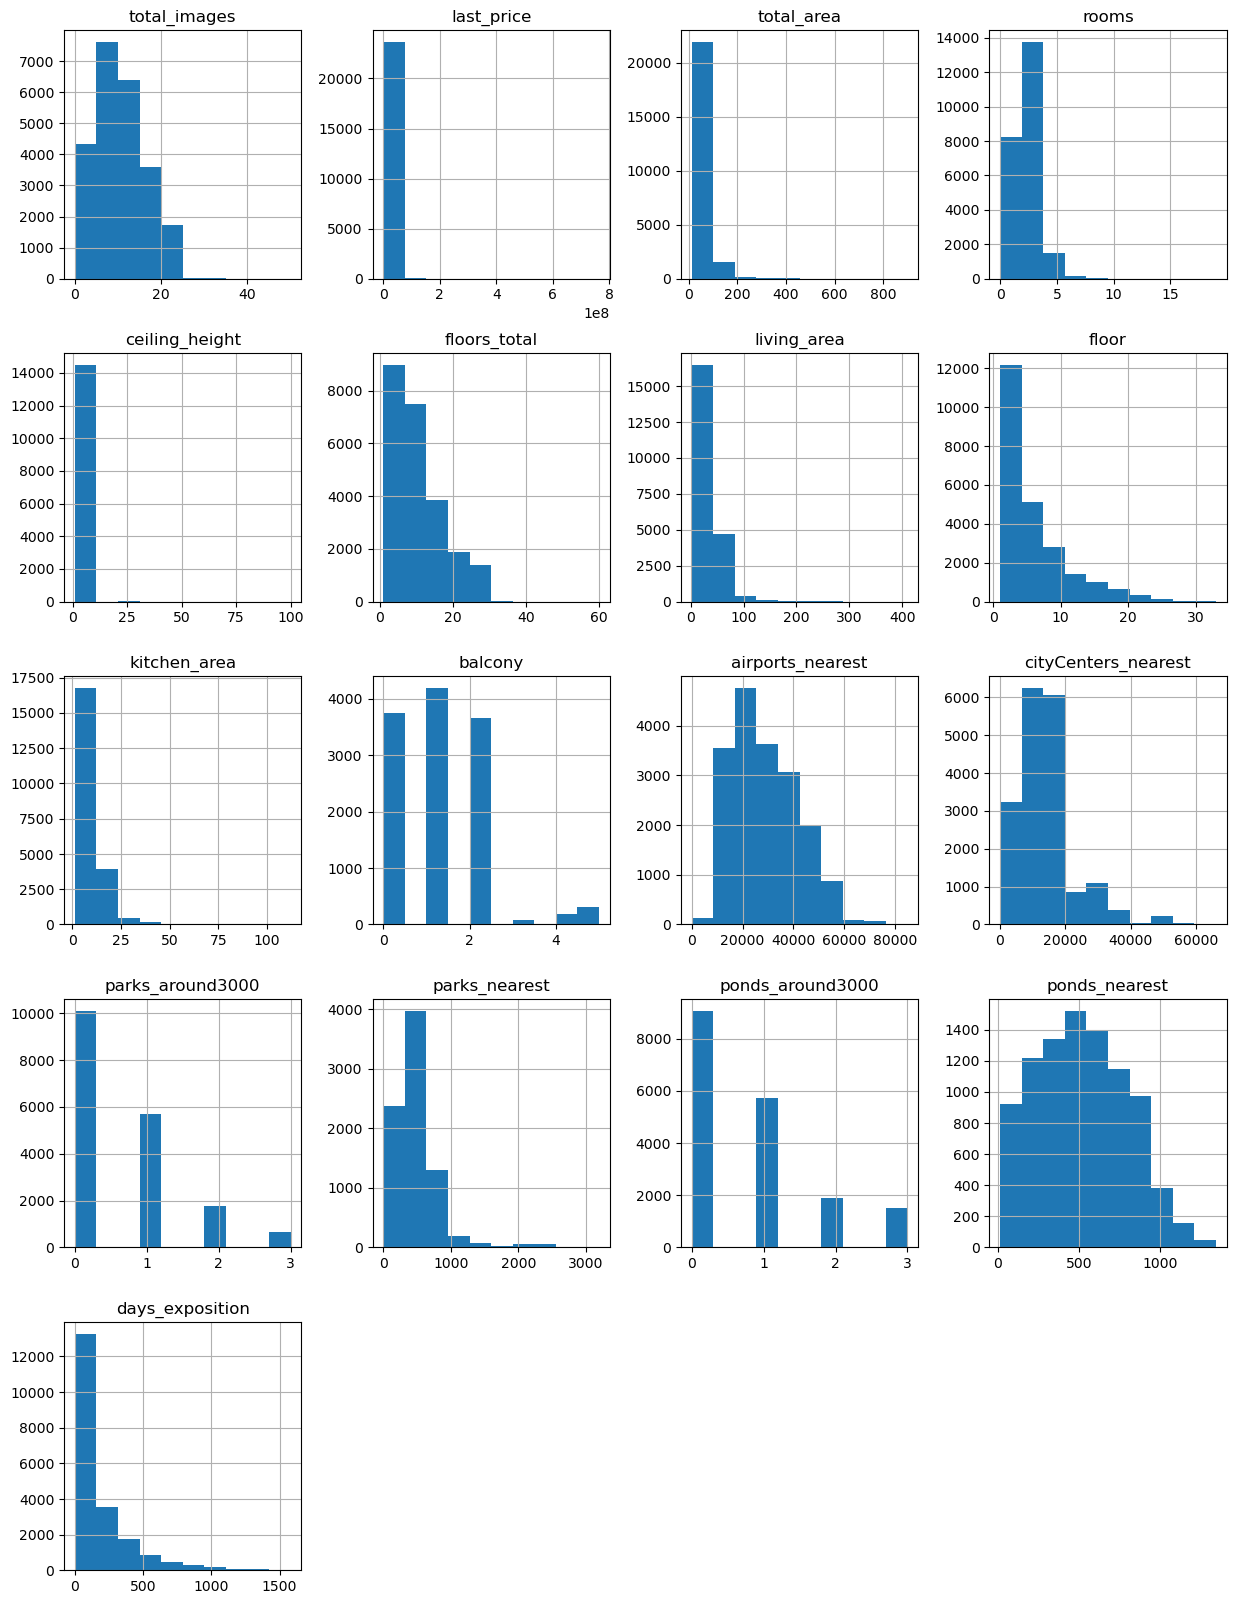

In [5]:
data.hist(figsize=(15,20));

#### Промежуточный вывод

При первичном анализе были выявлены несколько аномалий, которые необходимо изучить:
- минимальное количество комнат = 0,
- минимальная высота потолков 1 метр, максимальная - 100 метров,
- минимальное значение жилой площади 2 кв.м.

По информации о датафрейме ясно, что достаточно много пропусков.

### Предобработка данных

#### Убираем неявные дубликаты в столбце 'locality_name'

In [6]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [7]:
def clean_names(city_name):
    a = re.sub(r'посёлок |поселок |деревня |городского типа |садовое товарищество |городской \
    |коттеджный |при железнодорожной станции |станции |Пансионат |село |\
     садоводческое некоммерческое товарищество |имени ', "", str(city_name))
    return a
data['locality_name'] = data['locality_name'].apply(lambda x: clean_names(x) if x != 'nan' else x)

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'городской Янино-1', 'Парголово',
       'Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'Кудрово', 'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина',
       'Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокс

**Вывод:**

Первое, что сделали - заменили неявные дубликаты в столбце с названиями населенных пунктов. Поменяли порядок действий для того, чтобы дальнейшая работа с пропусками в столбце ceiling_height была более качественная.

#### Найдем количество пропущенных значений для каждого столбца датафрейма

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что пустых значений достаточно много, находятся они в 14 столбцах. Детально рассмотрим каждый из них по порядку.

#### Обработка пустых значений

1. **ceiling_height** — высота потолков (м): важный показатель в данном исследовании, мы не можем совсем исключить строки с пустым значением или оставить данные, как есть. Поэтому необходимо найти способ, как заполнить пропуски. Для начала определим причину, почему они возникли. Возможно, продавец не указал эти данные, так как у него нет точных сведений о высоте помещений, например, на момент создания объявления его не было в городе, поэтому не было возможности уточнить этот вопрос. Но всё же данные о высоте потолков в квартире сильно влияют на другие показатели, и если мы хотим, чтобы исследование было наиболее точным, нам надо восполнить данные пропуски. Количественные переменные обычно заполняют средним арифметическим значением или медианой. Но мы не можем взять абсолютно все данные, потому что в разных районах города могут быть разные средние высоты потолков - в центре это квартиры с высокими потолками, а вероятность найти большое количество квартир с потолками выше 3х метров на окраине города или в поселках крайне мала. 

Будем опираться на столбец "cityCenters_nearest": заполним пропуски по высоте потолков медианным значением высоты потолков квартир, равноудаленных от центра СПб. Например, условно 5 объектов попадает в удаленность от центра 10 км. В строке с пропуском, где указано расстояние 10 км, будет проставлено медианное значение высот потолков этих 5 объектов.

Добавим новый столбец "cityCenters_nearest_new", в котором будут округленные значения расстояний от центра, переведенные в км.

In [10]:
data['cityCenters_nearest_new'] = round((data['cityCenters_nearest']/1000), 0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8.0


Создадим функцию, которая будет отбирать строки с высотами потолков в рамках каждого километража (расстояния от центра) и присваивать медианное значение ceiling_height.

In [11]:
for t in data['cityCenters_nearest_new'].unique():
    try:
        data.loc[(data['cityCenters_nearest_new'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[(data['cityCenters_nearest_new'] == t), 'ceiling_height'].median()
    except:
        print(t)

У нас вышла ошибка, что мы не можем взять медиану от пустого множества, поэтому проверим теорию, что пропуски в столбце ceiling_height соответствуют пропускам в столбце cityCenters_nearest. Напомним, что пропусков в данных столбцах:

- ceiling_height: 9195
- cityCenters_nearest: 5519

In [12]:
data[{'ceiling_height', 'cityCenters_nearest_new'}].isna().sum()

ceiling_height             2578
cityCenters_nearest_new    5519
dtype: int64

In [13]:
# сверяем, в скольких строках пустые значения одновременно присутствуют в обоих столбцах
len(data.loc[(data['ceiling_height'].isna()) & (data['cityCenters_nearest'].isna())])

2575

2575 - это те строки, где нет и высоты потолков, и расстояния от центра
после замены медианным значением. При этом пустых значений в столбце ceiling_height - 2578.
Значит, 3 квартиры находятся на таком расстоянии, что рядом с ними нет соседних квартир, чтобы выявить медиану потолков.
Во всех остальных пропусках заполним строки медианным значением высоты потолков, которое мы получили, путем вызова функции describe(), то есть, 2.65м.

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=2.65)
data['ceiling_height'].isna().sum()

0

2. **floors_total** — всего этажей в доме: к сожалению, мы не обладаем дополнительной информацией, например, как названия жилых комплексов, чтобы можно было опираться на них и определить хотя бы для части пропущенных значений этажность дома, в котором квартира продается. Поэтому мы оставим данные такими, какие они есть, так как эта информация не крайне важна для нашего исследования.

3. **living_area** — жилая площадь в квадратных метрах (м²): как и в случае с этажностью дома, мы оставим данные без изменений, так как общую жилую площадь невозможно определить с точностью, взяв среднее или медиану.

4. **is_apartment** — апартаменты (булев тип): подобного рода информацию продавец мог не предоставить, потому что те, кто продает апартаменты, точно знают, что это именно апартменты. А владельцы квартир не всегда осведомлены о разнице между квартирой и апартаментами, поэтому вероятнее всего оставили это поле пустым. В данном случае нужно проверить, можем ли мы заменить пропущенные значения на False, что означает, что это не апартаменты.

Посмотрим, какое количество пропусков в столбце:

In [15]:
data['is_apartment'].value_counts().sort_values(ascending=True)

True       50
False    2725
Name: is_apartment, dtype: int64

Видно, что "квартир" в датафрейме 2725, "апартаментов" всего 50. Посмотрим, какое количество квартир и апартаментов всего в таблице и посчитаем процент апартментов от общего числа.

In [16]:
m = data[data['is_apartment'] == True]['is_apartment'].count()
n = data[data['is_apartment'] != 'NaN']['is_apartment'].count()
round((m/n)*100,2)

1.8

1.8% от общего числа квартир и апартаментов (с заполненной информацией) на продажу - очень низкий процент, что означает, что данные не содержат детальной информации, является ли объект на продажу апартаментами или нет. Это может быть связано с тем, что апартаменты не привлекательны для покупателя по ряду причин, чаще всего клиенты ставят фильтр, чтобы исключить из поиска апартаменты. Продавцы могут пойти на уловку, просто не указать информацию, в том числе поэтому мы и получаем пропуски. Напомню, что пропусков в этом столбце - 20924, это самое большое количество пропущенных значений во всем датафрейме.

Принимаем решение не менять пропущенные значения в столбце "is_apartment".

5. **kitchen_area** — площадь кухни в квадратных метрах (м²): площадь кухни продавцы также могут не знать, особенно в случае со студией, когда нельзя точно сказать метраж кухни, если на руках нет плана БТИ. Но информация не понадобится для исследования, поэтому оставим строки пустыми. 

6. **balcony** — число балконов: если продавец не указал количество балконов, значит, их скорее всего нет, поэтому заменим пустые значения на 0.

In [17]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [18]:
data['balcony'].value_counts().sort_values(ascending=True)

3.0      81
4.0     183
5.0     304
2.0    3659
0.0    3758
1.0    4195
Name: balcony, dtype: int64

В данном случае все достаточно просто, те продавцы, которые не указали количество балконов в своем объявлении, продают квартиру, где балкон отсутствует вовсе. Поэтому заменяем пустые значения на 0.

In [19]:
data['balcony'] = data['balcony'].fillna(value=0.0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.630,11.0,18.6,1,NaN,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.600,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.985,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8.0


7. **locality_name** — название населённого пункта: невозможно определить название населенного пункта по имеющимся данным, вероятнее всего, данные пропуски возникли по причине того, что владельцы квартир в Санкт-Петербурге выставляли объявление в категории "Санкт-Петербург" без учета того, что есть еще и Ленинградская область и посчитали ненужным указывать "очевидное". Мы можем заполнить отсутствующие значения, только принимая во внимание столбец "cityCenters_nearest_new", где обработали данные по расстоянию от центра. Сможем проставить недостающие названия населенных пунктов - но только в рамках Санкт-Петербурга.

Напомним, что у столбца locality_name всего 49 пропущенных значений.

In [20]:
data['locality_name'].loc[data['locality_name'] == 'nan'].count()

49

In [21]:
k = data['locality_name'].shape[0]
l = data['locality_name'].loc[data['locality_name'] == 'nan'].count()
round((l/k)*100,2)

0.21

Доля пустых строк в столбце locality_name всего 0.2%. Мы можем удалить эти строки, так как это никак не повлияет на качество анализа. Но предварительно определим квартиры в районе Санкт-Петербурга, и если они попадают в данный срез - дополним эту информацию.

In [22]:
data.loc[(data['cityCenters_nearest'] <= 18000) & (data['locality_name'] == 'nan'), 'locality_name'] = 'Санкт-Петербург'

Избавились от пустых значений, которые точно находятся в районе Санкт-Петербурга согласно карте - до 18км от центра до КАДа, проверим количество NaN после обработки.

In [23]:
data['locality_name'].loc[data['locality_name'] == 'nan'].count()

12

Соответственно, в 37 строках проставлены значения в locality_name. Посмотрим оставшиеся строки.

In [24]:
data.loc[data['locality_name'] == 'nan'].head(12)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.6,2,NaN,...,0.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,2.54,NaN,68.1,4,NaN,...,0.0,nan,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0,32.0
13690,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.6,1,False,...,2.0,nan,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0,24.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,2.65,4.0,25.8,3,False,...,1.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,2.65,9.0,NaN,2,False,...,0.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,213.0,NaN
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,2.65,5.0,47.3,2,NaN,...,0.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,NaN,...,1.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN
21119,8,3500000.0,43.2,2018-11-11T00:00:00,2,2.54,4.0,NaN,2,NaN,...,0.0,nan,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0,32.0
21276,0,17122148.0,178.3,2017-02-10T00:00:00,1,2.75,3.0,NaN,1,NaN,...,1.0,nan,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0,41.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,2.65,9.0,30.5,2,False,...,0.0,nan,NaN,NaN,NaN,NaN,NaN,NaN,176.0,NaN


Осталось 12 строк, в которых нельзя точно определить локацию. Оставим, как есть.

8. По всем последующим показателям оставим пропуски как есть, потому что данные могут быть не заполнены по причине фактического отсутствия поблизости (в радиусе 3км) парков, водоемов или аэропорта (например, если взять область).
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)

9. Остался последний показатель, в котором есть пропуски:
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

In [25]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Пропущенных значений в столбце days_exposition уже гораздо больше - 3180.

In [26]:
data['days_exposition'].isna().sum()

3181

Достаточно много пропусков, но при этом эти данные должны были быть выгружены автоматически из базы данных, поэтому не будем трогать пропущенные значения и оставим всё, как есть.

In [27]:
# для начала переведем first_day_exposition в формат datetime
# и добавим столбец с годом публикации (было сделано в Шаге 3)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], \
                                              format = '%Y-%m-%dT%H:%M:%S')
data['year'] = data['first_day_exposition'].dt.year

In [28]:
# ограничим датафрейм - выведем только пустые строки в столбце days_exposition
data_d = data[data['days_exposition'].isnull()]
data_d.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16.0,2019
7,5,7915000.0,71.6,2019-04-18,2,2.60,24.0,NaN,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,12.0,2019
44,13,5350000.0,40.0,2018-11-18,1,2.60,22.0,NaN,3,NaN,...,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,12.0,2018
45,17,5200000.0,50.6,2018-12-02,2,2.65,9.0,30.3,7,NaN,...,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,13.0,2018
46,17,6600000.0,52.1,2019-01-31,2,2.60,24.0,29.7,9,NaN,...,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,13.0,2019


In [29]:
days_exp_pivot = pd.pivot_table(data_d,
                                index='year',
                                values='total_area', # посчитали по другому столбцу кол-во строк
                                aggfunc='count').rename(columns={'total_area':'count'})
days_exp_pivot

,count
year,
2014,18
2015,70
2016,67
2017,271
2018,959
2019,1796


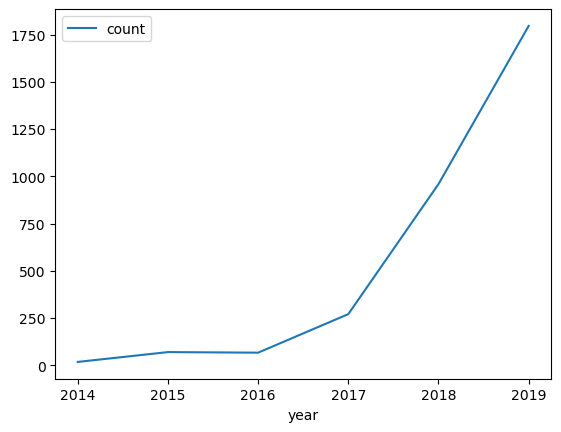

In [30]:
days_exp_pivot.plot(y='count');

Зависимость между годом и днем публикации показала, что с увеличением года количество пустых значений в столбце дня публикации существенно увеличивается.

#### Промежуточный вывод

Были обработаны все неявные дубликаты, а также обработаны пропуски по следующим столбцам:

- высота потолков: пропущенные значения заполнены медианным значением равноудаленных от центра Санкт-Петербурга, по остальным пропускам проставлены 2.65м, или медиана по всем высотам потолков.
- пропуски в балконах были заменены на 0.
- названия населенного пункта были обработаны в рамках Санкт-Петербурга и 12 строк оставили без изменений.
- число пропусков по критерию, является ли объект апартаментами или квартирой, в рамках апартаментов не соответствует действительности, поэтому пропуски оставили без изменений.
- количество дней, когда висело объявление, выгружается из базы данных, в данном случае пропуски - следствие технического сбоя при выгрузке данных, поэтому большое количество пропущенных значений не меняем.

По остальным столбцам было принято решение оставить пропуски без изменений.

#### Замена типов данных

Обратимся к информации о типе данных каждого столбца, чтобы определить, где нужно произвести замену.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  float64       
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23613 non-null  float64       
 7   living_area              21796 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             2775 non-null   object        
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             21421 n

Итак, заменим столбцы ниже на следующие типы данных:

- total_images: int64 - оставим без изменений, потому что количество изображений указаны в числовом виде
- **last_price**: float64 - заменим вещественный тип данных на целочисленный, так как нам не нужны копейки в данном случае - суммы гораздо больше 100 рублей.
- **total_area**: float64 - площадь квартиры обычно указывается с округлением до десятичных, поэтому **округлим** (оставляем вещественный тип данных)
- **first_day_exposition**: object - заменим на datetime
- rooms: int64 - оставим без изменений - всё корректно 
- **ceiling_height**: float64 - аналогично **округлим** до десятичных (оставляем вещественный тип данных)
- **floors_total**: float64 - заменим вещественный тип данных на целочисленный, потому что этаж не может быть с половиной.
- **living_area**: float64 - **округлим** до десятичных (оставляем вещественный тип данных) 
- floor: int64 - оставим без изменений - всё корректно
- is_apartment: object - оставим без изменений
- studio: bool - оставим без изменений - всё корректно
- open_plan: bool - оставим без изменений - всё корректно
- **kitchen_area**: float64 - **округлим** до десятичных (оставляем вещественный тип данных)
- **balcony**: float64 - заменим вещественный тип данных на целочисленный
- locality_name: object - оставим без изменений - всё корректно
- **airports_nearest**: float64 - заменим вещественный тип данных на целочисленный
- **cityCenters_nearest**: float64 - заменим вещественный тип данных на целочисленный
- **parks_around3000**: float64 - заменим вещественный тип данных на целочисленный
- **parks_nearest**: float64 - заменим вещественный тип данных на целочисленный
- **ponds_around3000**: float64 - заменим вещественный тип данных на целочисленный
- **ponds_nearest**: float64 - заменим вещественный тип данных на целочисленный
- **days_exposition**: float64 - заменим вещественный тип данных на целочисленный
- cityCenters_nearest_new: float64 - у нас уже использовано округление в столбце, оставим, как есть

Чтобы не выполнять для каждого столбца одну и ту же итерацию, создадим циклы:

In [32]:
# меняем вещественный тип данных на целочисленный
to_convert = {'last_price', 'balcony'}

In [33]:
for f in to_convert:
        data[f] = data[f].astype('int')

In [34]:
# меняем вещественный тип данных на целочисленный (в столбцах есть пустые строки)
to_convert_w_nan = {'floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', \
              'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'}

In [35]:
for i in to_convert_w_nan:
    data[i] = data[i].fillna(0).astype('int')

In [36]:
# меняем на datetime 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], \
                                              format = '%Y-%m-%dT%H:%M:%S')

In [37]:
# округлим до десятичных 
to_round = {'total_area', 'ceiling_height', 'living_area', 'kitchen_area'}

In [38]:
for o in to_round:
        data[o] = round(data[o], 1)

Проверим, заменены ли типы данных.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  int32         
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23699 non-null  int32         
 7   living_area              21796 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             2775 non-null   object        
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             21421 n

Теперь выведем датафрейм, чтобы убедиться в корректности наших действий.

In [40]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,Санкт-Петербург,18863,16028,1,482,2,755,0,16.0,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,Шушары,12817,18603,0,0,0,0,81,19.0,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,Санкт-Петербург,21741,13933,1,90,2,574,558,14.0,2015
3,0,64900000,159.0,2015-07-24,3,3.0,14,NaN,9,NaN,...,Санкт-Петербург,28098,6800,2,84,3,234,424,7.0,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,Санкт-Петербург,31856,8098,2,112,1,48,121,8.0,2018
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,NaN,...,городской Янино-1,0,0,0,0,0,0,55,NaN,2018
6,6,3700000,37.3,2017-11-02,1,2.6,26,10.6,6,NaN,...,Парголово,52996,19143,0,0,0,0,155,19.0,2017
7,5,7915000,71.6,2019-04-18,2,2.6,24,NaN,22,NaN,...,Санкт-Петербург,23982,11634,0,0,0,0,0,12.0,2019
8,20,2900000,33.2,2018-05-23,1,2.6,27,15.4,26,NaN,...,Мурино,0,0,0,0,0,0,189,NaN,2018
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,NaN,...,Санкт-Петербург,50898,15008,0,0,0,0,289,15.0,2017


#### Убираем неявные дубликаты в столбце 'ceiling_height' и других

1. Устраним редкие и выбивающиеся значения в столбце 'ceiling_height'.

In [41]:
sorted(data['ceiling_height'].unique())

[1.0,
 1.2,
 1.8,
 2.0,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.2,
 5.3,
 5.5,
 5.6,
 5.8,
 6.0,
 8.0,
 8.3,
 10.3,
 14.0,
 20.0,
 22.6,
 24.0,
 25.0,
 26.0,
 27.0,
 27.5,
 32.0,
 100.0]

Видим, что в столбце ceiling_height выбиваются из логики некоторые высоты.
В данном исследовании установим минимальную высоту потолков в 2.5м - "хрущевки", а с максимальной высотой есть варианты. Например, можем исходить из рассчета 3.6м, если это "сталинки". Но есть вероятность того, что квартиры могут быть двухэтажными и даже более (пентхаусы, например), но продавцы не имеют возможность указать диапазон этажей в нашем случае. Посмотрим, какие это могут быть квартиры и какая в них отличительная особенность - большая площадь? Определим, что высота квартир будет от 2.5 до 14.0 метров, и в рамках диапазона от 5м до 14м посмотрим данные. А остальной разброс - это ошибка в данных. Все значения выше 20.0м уменьшим в 10 раз.

In [42]:
data.query('5.0 <= ceiling_height <= 14.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year
464,15,66571000,280.3,2015-06-11,6,5.2,8,159.5,7,NaN,...,Санкт-Петербург,26316,6655,3,187,1,616,578,7.0,2015
1026,20,155000000,310.0,2018-10-12,5,5.3,3,190.0,3,NaN,...,Санкт-Петербург,24899,4785,0,0,1,603,0,5.0,2018
1053,13,550000,29.0,2018-02-01,1,5.0,3,NaN,1,False,...,Бокситогорск,0,0,0,0,0,0,6,NaN,2018
1388,20,59800000,399.0,2015-01-21,5,5.6,6,NaN,6,NaN,...,Санкт-Петербург,26204,6934,2,149,2,577,719,7.0,2015
3474,3,1400000,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,Нурма,0,0,0,0,0,0,125,NaN,2018
5863,20,5650000,45.0,2018-08-15,1,8.3,16,19.3,14,NaN,...,Санкт-Петербург,13069,10763,0,0,1,613,14,11.0,2018
7578,17,38000000,143.0,2017-11-02,3,5.5,5,83.0,5,NaN,...,Санкт-Петербург,26333,6448,3,479,0,0,0,6.0,2017
12628,14,3900000,50.0,2018-03-29,1,5.3,5,NaN,5,NaN,...,Санкт-Петербург,19644,3918,1,505,1,92,8,4.0,2018
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,NaN,...,Санкт-Петербург,14814,13610,0,0,0,0,315,14.0,2018
15743,14,5600000,67.0,2016-11-11,3,8.0,16,41.0,1,NaN,...,Санкт-Петербург,32691,11035,1,723,0,0,474,11.0,2016


Всего 14 строк с данными по высоте потолков от 5м до 14м, судя по площади и количеству комнат можно сделать вывод, что это реальные высоты квартир, но в случае с 10м и 14м - это вряд ли двухэтажные квартиры с площадью всего 45м2 и 56м2 соответственно, поэтому исключим их из нашего диапазона. Ради интереса посмотрим на срез квартир с потолками выше 20м.

In [43]:
data.query('ceiling_height >= 20.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,Гатчина,0,0,0,0,0,0,259,NaN,2018
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,NaN,...,Волхов,0,0,0,0,0,0,0,NaN,2018
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,NaN,...,Санкт-Петербург,12016,13256,1,658,1,331,181,13.0,2018
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,NaN,...,Мурино,0,0,0,0,0,0,28,NaN,2017
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,Санкт-Петербург,29686,8389,3,397,1,578,7,8.0,2018
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,NaN,...,Мины,0,0,0,0,0,0,540,NaN,2017
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,NaN,...,Санкт-Петербург,28981,10912,1,305,0,0,267,11.0,2017
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,NaN,...,Санкт-Петербург,18732,20444,0,0,3,80,38,20.0,2019
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,NaN,...,Кронштадт,68923,50649,1,417,2,73,0,51.0,2019
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,NaN,...,Санкт-Петербург,11647,13581,0,0,0,0,0,14.0,2017


Здесь уже 23 строки с данными, из которых понятно, что это ошибка - надо было указать не 27м, а 2.7м, например. Сначала исправим строки, в которых высота потолка была написана некорректно, затем уберем то, что ниже 2.5м и то, что выше 10.0м.

In [44]:
data['ceiling_height'].mask(data['ceiling_height'] >= 20.0, (data['ceiling_height'])/10, inplace=True)    
data.query('ceiling_height >= 10.0') # проверим, что строки не имеют значения выше 20.0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,NaN,...,Санкт-Петербург,14814,13610,0,0,0,0,315,14.0,2018
22309,20,5300000,45.0,2017-09-30,1,10.3,16,15.5,15,NaN,...,Санкт-Петербург,36353,11936,2,440,2,450,136,12.0,2017
22869,0,15000000,25.0,2018-07-25,1,10.0,5,14.0,5,True,...,Санкт-Петербург,34963,8283,1,223,3,30,19,8.0,2018


Заметим, что строка, где высота была указана 100м, тоже появилась в срезе - от нее мы тоже избавимся.

In [45]:
data.loc[355, 'ceiling_height'] # проверим на примере 355 индекса, где значение было 25.0,
# что исправление корректно

2.5

In [46]:
# убираем строки ниже 2.5м и выше 10м
data = data.loc[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] < 10.0)] 

In [47]:
data.query('ceiling_height >= 10.0') # проверим, что строки не имеют значения выше 10.0м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year


In [48]:
data.query('ceiling_height < 2.5') # проверим, что строки не имеют значения ниже 2.4м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year


2. Рассмотрим также столбец **'balcony'**.

В столбце 'balcony' есть весьма странные квартиры с пятью балконами, причем количество таких объектов достаточно большое. Судя по данным ниже, есть пример с метражом квартиры 40.40 и 30.2 кв.м., где трудно уместить 5 балконов - там даже и одного может не быть.

In [49]:
balcony_new = pd.pivot_table(data, index=['balcony'], values=['ceiling_height'], \
                             aggfunc='count').rename(columns={'ceiling_height':'count'})
                             
balcony_new = balcony_new.sort_values(by=['balcony'], ascending=True)
balcony_new.head(10)

,count
balcony,
0,15244
1,4178
2,3650
3,79
4,183
5,300


Сделаем срез по двум столбцам:

In [50]:
balcony_data = data.query('balcony >= 3.0')

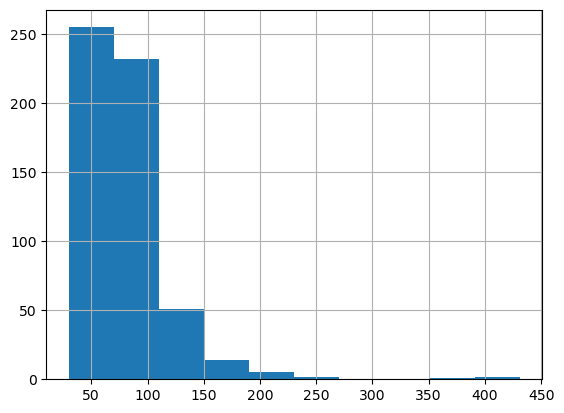

In [51]:
balcony_data['total_area'].hist();

Считаем странным тот факт, что квартиры с площадью менее 100 кв.м. имеют более 3х балконов. Поэтому удалим строки, где балконов больше 3х и площадь квартиры менее 100 кв.м.

In [52]:
data = data.loc[(data['balcony'] < 3.0) | ((data['total_area'] >= 100.0) & (data['balcony'] >= 3.0))]

Проверим, избавились ли мы от таких строк:

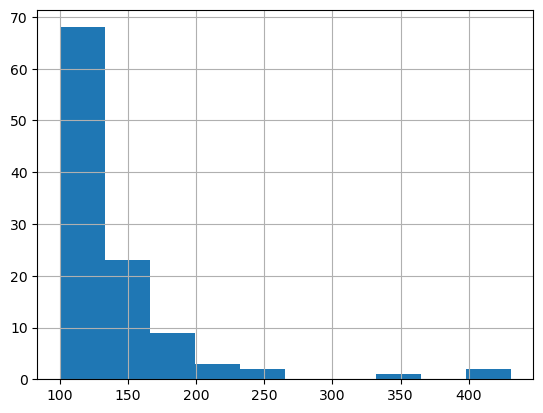

In [53]:
balcony_data = data.query('balcony >= 3.0')
balcony_data['total_area'].hist();

3. Рассмотрим столбец **'rooms'**.

В столбце 'rooms' смущают 0 комнат, выведем срез по таким данным:

In [54]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year
144,1,2450000,27.0,2017-03-30,0,2.6,24,15.5,2,NaN,...,Мурино,0,0,0,0,0,0,181,NaN,2017
349,4,2320000,25.0,2017-09-27,0,2.6,14,17.0,1,NaN,...,Кудрово,0,0,0,0,0,0,45,NaN,2017
440,8,2480000,27.1,2018-03-12,0,2.6,17,24.8,4,NaN,...,Санкт-Петербург,38171,15015,0,0,2,982,64,15.0,2018
508,0,3375000,34.4,2017-03-28,0,2.6,26,24.3,19,NaN,...,Парголово,53115,19292,0,0,1,593,430,19.0,2017
608,2,1850000,25.0,2019-02-20,0,2.6,10,NaN,7,NaN,...,Шушары,0,0,0,0,0,0,29,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.0,2017-09-01,0,2.6,25,18.0,16,NaN,...,Санкт-Петербург,11405,13222,0,0,1,623,14,13.0,2017
23442,0,2500000,27.7,2017-09-28,0,2.6,24,18.0,4,NaN,...,Мурино,0,0,0,0,0,0,4,NaN,2017
23554,15,3350000,26.0,2018-09-07,0,2.6,19,NaN,8,NaN,...,Санкт-Петербург,18090,17092,0,0,2,112,31,17.0,2018
23592,10,1450000,29.0,2017-11-11,0,2.6,9,18.0,8,NaN,...,Никольское,0,0,0,0,0,0,82,NaN,2017


197 строк с нулевыми комнатами. Выведем распределение комнат по общей площади квартиры.

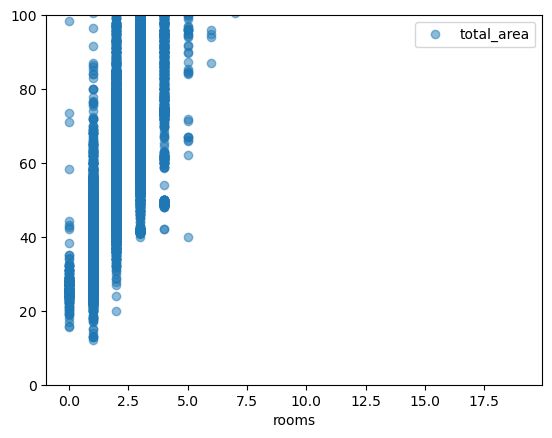

In [55]:
data.plot(x='rooms', y='total_area', style='o', alpha=0.5, ylim=(0,100));

Понимаем, что большое количество объектов с нулевыми комнатами в диапазоне от 20 до 40 м2. Проверим, являются ли все эти объекты студиями или квартирами с открытыми планировками.

In [56]:
# ограничим датафрейм - оставим необходимые для исследования столбцы
data_r = data[data['rooms'] == 0]
data_r = data_r.loc[:, ['rooms', 'studio', 'open_plan']]
data_r

,rooms,studio,open_plan
144,0,True,False
349,0,False,True
440,0,True,False
508,0,False,True
608,0,True,False
...,...,...,...
23210,0,True,False
23442,0,False,True
23554,0,True,False
23592,0,False,True


Видим, что продавец при указании комнат "0" ставил:
1. Либо True в столбце studio и False в столбце open_plan, что означает, что объект - студия.
2. Либо False в столбце studio и True в столбце open_plan, что означает, что объект с открытой планировкой.

Убедимся, совпадает ли это количество по всем строкам.

In [57]:
len(data_r.loc[(data_r['studio'] == True) & (data_r['open_plan'] == False)])

138

In [58]:
len(data_r.loc[(data_r['studio'] == False) & (data_r['open_plan'] == True)])

59

Да, совпадает, в сумме получается 197 строк, сколько и "пропущенных" значений в столбце rooms.

Делаем вывод, что продавец умышленно поставил значение 0 в столбце rooms, и мы не будем удалять строки или заменять их на другие значения.

4. Рассмотрим столбец **'living_area'**.

В столбце 'living_area' есть строка с жилой площадью 2 м2.

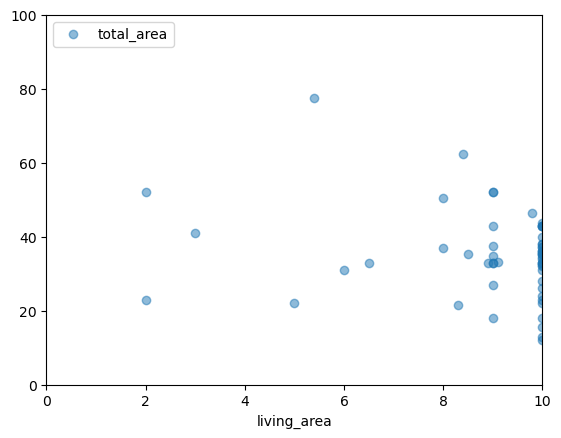

In [59]:
data.plot(x='living_area', y='total_area', style='o', alpha=0.5, xlim=(0,10), ylim=(0,100));

По нормативам человеку необходимо не менее 10 м2 жилой площади. Исходя из этого, заменим все значения менее 10 кв.м. на 80% от общей площади квартиры.

In [60]:
data['living_area'][(data['living_area'] <= 10.0)] = round((data['total_area']*0.8),0)

<a id='gap'></a>
5. Рассмотрим столбец **'last_price'**.

В столбце 'last_price' есть минимальное значение - 1.219000e+04 или 12.190. Рассмотрим, какие еще есть выбросы.

In [61]:
data['last_price'].describe()

count    2.318000e+04
mean     6.541290e+06
std      1.099488e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [62]:
data['last_price'].sort_values(ascending=False).tail()

9581     450000
16274    440000
14911    430000
17456    430000
8793      12190
Name: last_price, dtype: int32

Видим, что у нас одна строка с ценой квартиры 12.190, при этом суммы в 400.000+ выглядят более реалистичнее, так как продаваемые квартиры находятся не в Санкт-Петербурге, и площадь таких объектов невелика:

In [63]:
data_l = data.query('last_price < 500000')
data_l

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year
5698,7,450000,42.0,2017-07-31,2,2.6,1,23.0,1,NaN,...,городской Будогощь,0,0,0,0,0,0,233,NaN,2017
6859,6,490000,40.0,2017-12-11,1,2.6,5,NaN,3,NaN,...,Старополье,0,0,0,0,0,0,43,NaN,2017
8793,7,12190,109.0,2019-03-20,2,2.8,25,32.0,25,NaN,...,Санкт-Петербург,36421,9176,1,805,0,0,8,9.0,2019
9581,7,450000,43.4,2018-08-31,2,2.6,5,30.3,3,NaN,...,Старополье,0,0,0,0,0,0,96,NaN,2018
10782,3,490000,29.1,2016-05-05,1,2.5,5,17.0,5,NaN,...,Сланцы,0,0,0,0,0,0,719,NaN,2016
14911,5,430000,54.0,2018-06-26,2,2.6,3,NaN,3,NaN,...,Свирь,0,0,0,0,0,0,44,NaN,2018
16032,8,480000,32.0,2019-01-06,1,2.6,2,16.0,1,NaN,...,Сланцы,0,0,0,0,0,0,83,NaN,2019
16219,14,450000,38.5,2018-07-11,2,2.6,2,NaN,1,NaN,...,Вахнова Кара,0,0,0,0,0,0,45,NaN,2018
16274,18,440000,40.0,2018-07-10,1,2.6,5,NaN,1,NaN,...,Старополье,0,0,0,0,0,0,45,NaN,2018
17456,7,430000,30.4,2019-04-22,1,2.6,2,16.0,1,NaN,...,Сланцы,0,0,0,0,0,0,0,NaN,2019


Обрежем датафрейм, чтобы стоимость объекта была выше 400.000.

In [64]:
data = data.loc[(data['last_price'] >= 400000)]

#### Промежуточный вывод

На данном этапе были выявлены выбивающиеся значения, такие как:

- высота потолков 25м, 32м, 100м и т.д., явные ошибки были заменены на корректные значения в метрах, данные в остальных строках были удалены из датафрейма.
- количество балконов более 3х, где площадь квартиры составляла менее 100 кв.м., были удалены.
- нулевые комнаты были заменены на те значение, которые соответсвуют критерию: одна комната равна 30 кв.м., если площадь квартиры составляет 26 кв.м., к ней присваивается значение 1.
- жилая площадь менее 10 кв.м. была заменена на значения, равные 80% от общей площади квартиры.

Основная работа по предобработке данных сделана, переходим к следующему этапу.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец с рассчитанной ценой за 1 кв.м.:

In [65]:
data['price_per_sq_m'] = (data['last_price']/data['total_area']).astype('int')

Добавим столбец с днем недели публикации объявления, где 0 - понедельник, 1 - вторник и т.д.:

In [66]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Добавим столбец с месяцем публикации объявления:

In [67]:
data['month'] = data['first_day_exposition'].dt.month

Добавим столбец с годом публикации объявления:

In [68]:
data['year'] = data['first_day_exposition'].dt.year

Добавим столбец с типом этажа квартиры, где 1й этаж - "первый", последний - "последний", остальные - "другой".

In [69]:
data['floor_type'] = data.apply(lambda x: 'последний' if x['floor'] == x['floors_total'] \
                                else 'другой', axis=1)
data['floor_type'] = data.apply(lambda x: 'первый' if x['floor'] == 1 else x['floor_type'], axis=1)

Столбец с расстоянием до центра города в километрах и округлением до целых чисел уже был создан - cityCenters_nearest_new. Проверим, все ли столбцы добавлены:

In [70]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year,price_per_sq_m,weekday,month,floor_type
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,482,2,755,0,16.0,2019,120370,3,3,другой
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,0,0,0,81,19.0,2018,82920,1,12,первый
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,90,2,574,558,14.0,2015,92785,3,8,другой
3,0,64900000,159.0,2015-07-24,3,3.0,14,NaN,9,NaN,...,84,3,234,424,7.0,2015,408176,4,7,другой
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,112,1,48,121,8.0,2018,100000,1,6,другой


**Вывод**: 

В датафрейм были добавлены 6 новых столбцов для последущего исследовательского анализа данных.

### Исследовательский анализ данных

##### Общая площадь

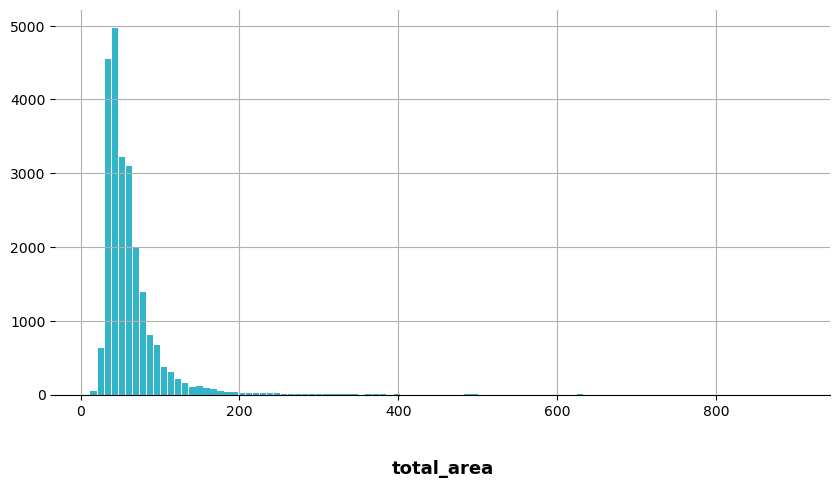

In [71]:
def hist(f1):
    ax = data.hist(column=f1, 
             bins=100, 
             grid=True,
             figsize=(10,5), 
             color="#32B5C9",
             rwidth=0.9)

    ax = ax[0]
   
    for x in ax:
        x.set_title("")
        x.set_xlabel(f1, labelpad=30, weight='bold', size=13)
        x.set_ylabel("", labelpad=30, weight='bold', size=13)

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)
        return hist
    
   
hist1 = hist('total_area')

По графику видно, что наибольшее количество объявлений о продаже жилья сделано с квартирами, общая площадь которых до 100 квадратных метров, а именно от 40 до 69 кв.м. Это логично, потому что квартиры с площадью более 100 кв.м. считаются уже более дорогими объектами. Самое большое количество объявлений с квартирами около 70 м2, что в среднем считается двухкомнатной квартирой, подходящей большинству семей.

In [72]:
data['total_area'].describe()

count    23179.000000
mean        60.215057
std         35.951097
min         12.000000
25%         40.000000
50%         51.500000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

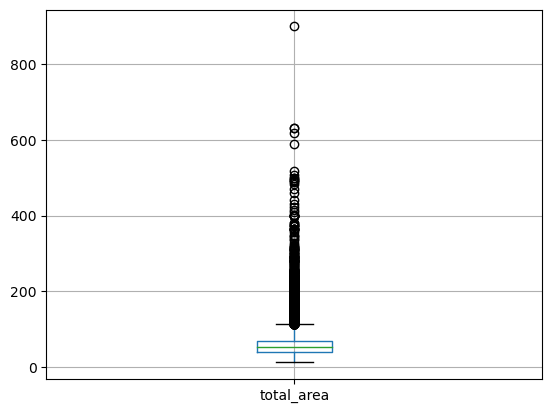

In [73]:
data.boxplot(column='total_area');

Квартиры с общей площадью выше примерно 103 кв.м. уже считаются выбросами.

##### Жилая площадь

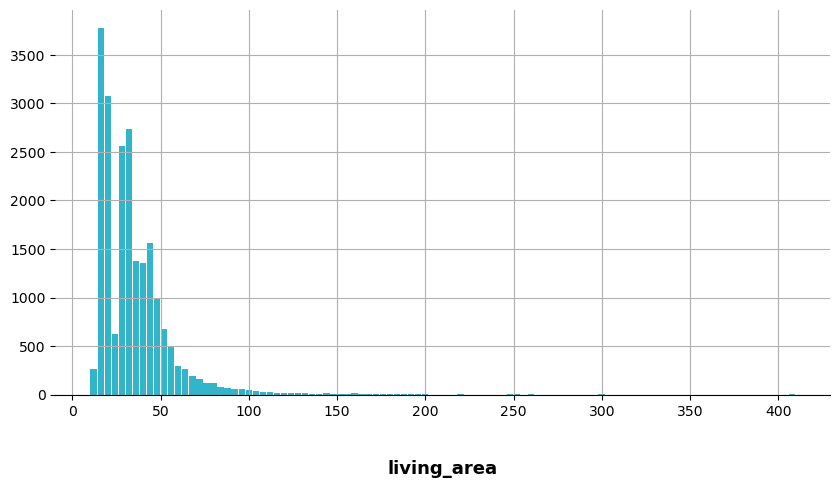

In [74]:
hist2 = hist('living_area')

Что касается жилой площади в квартире, то большинство публикаций сделано с жилой площадью в промежутке от 18 м2 до 42 м2. Это вполне нормально, потому что большинство продается однокомнатных квартир (это видно в исследовании гистограммы по комнатам ниже), в том числе и студий, где жилая площадь составляет около 20 кв.м, исключая площадь прихожей, санузла, кухни.

In [75]:
data['living_area'].describe()

count    21302.000000
mean        34.408243
std         22.176798
min         10.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

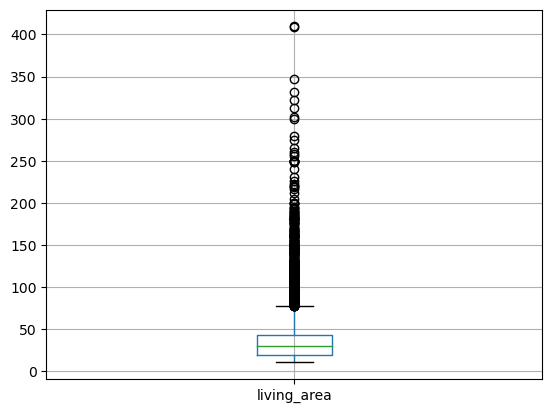

In [76]:
data.boxplot(column='living_area');

Жилая площадь, которая составляет 63 кв.м. и более, считается выбросами.

##### Площадь кухни

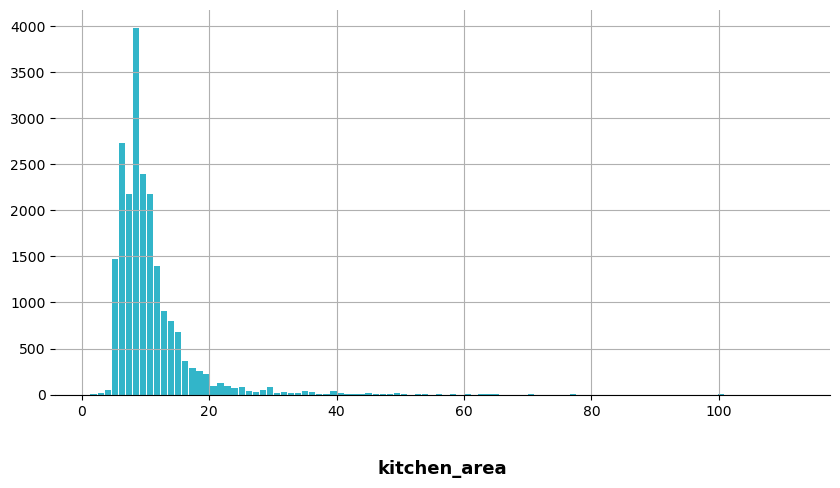

In [77]:
hist3 = hist('kitchen_area')

Большинство объявлений о продаже жилья создано с квартирами, где площадь кухни составляет от 7 кв.м. до 12 кв.м. - в целом стандартный метраж кухни. Предложений с кухнями от 12 м2 до 20 м2 тоже много, на что может влиять тот факт, что в квартире планировка с кухней-гостиной.

In [78]:
data['kitchen_area'].describe()

count    20921.000000
mean        10.564270
std          5.935045
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

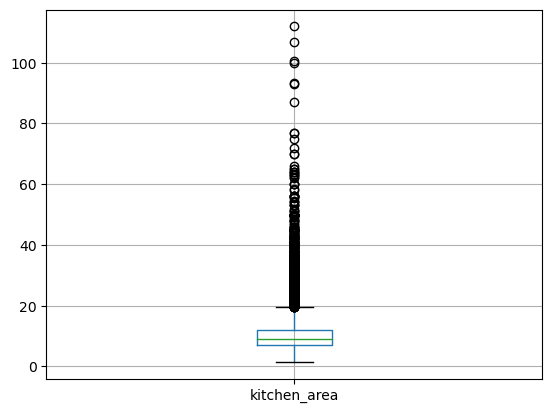

In [79]:
data.boxplot(column='kitchen_area');

Кухни с метражем более 18 кв.м. - выбросы.

##### Цена объекта

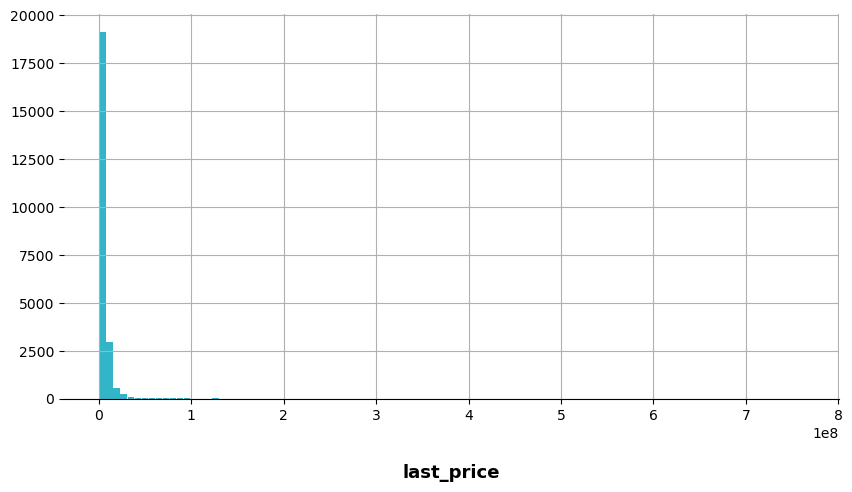

In [80]:
hist4 = hist('last_price')

На графике указана цена на объекты в переводе на миллиарды, поэтому будем рассматривать график с этим уточнением. Большинство объявлений о продаже квартир находятся в диапазоне от 3.4 млн до 6.75 млн.

In [81]:
data['last_price'].describe()

count    2.317900e+04
mean     6.541572e+06
std      1.099504e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Выявила минимальные значения стоимости за объект и удалила "выброс" [в разделе 2.4, пункт 5](#gap)

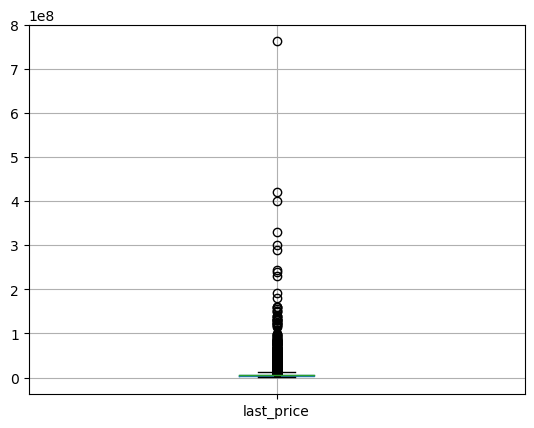

In [82]:
data.boxplot(column='last_price');

Квартиры стоимостью более 10 млн - выбросы.

##### Количество комнат

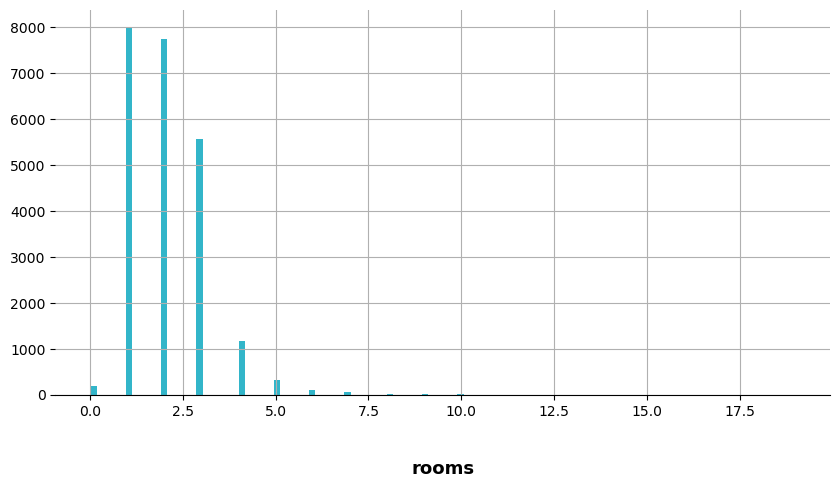

In [83]:
hist5 = hist('rooms')

На графике показано, что публикаций с однокомнатными квартирами больше всего, связано это тем, что в их число также входят студии. Чем больше комнат, тем количество предложений меньше, квартир с 4+ комнатами уже существенно меньше, чем "стандартных".

In [84]:
data['rooms'].describe()

count    23179.000000
mean         2.062255
std          1.083198
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

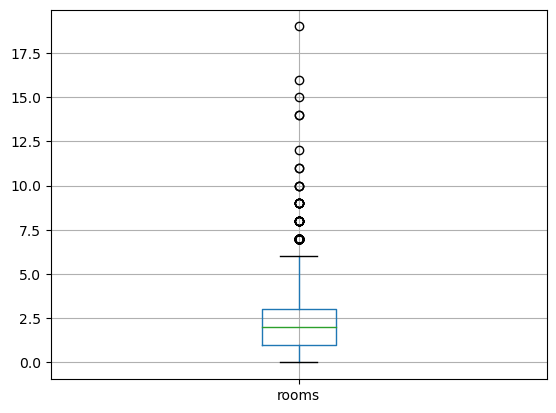

In [85]:
data.boxplot(column='rooms');

Квартиры с комнатами больше 5 - выбросы.

##### Высота потолков

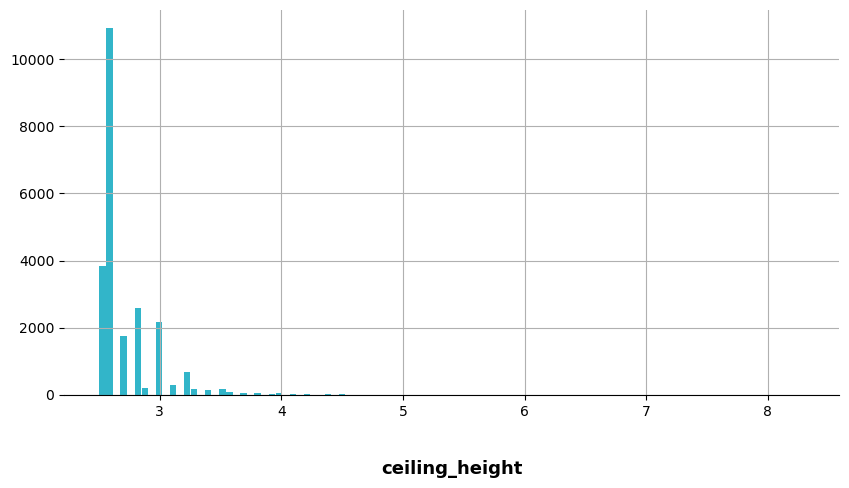

In [86]:
hist6 = hist('ceiling_height')

Предложений с квартирами, где потолки выше 3-х метров, гораздо меньше, чем "типичных" построек, что неудивительно, потому что более доступное жилье в среднем с потолками 2.6 м,что и отображено на графике.

In [87]:
data['ceiling_height'].describe()

count    23179.000000
mean         2.708980
std          0.251915
min          2.500000
25%          2.600000
50%          2.600000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

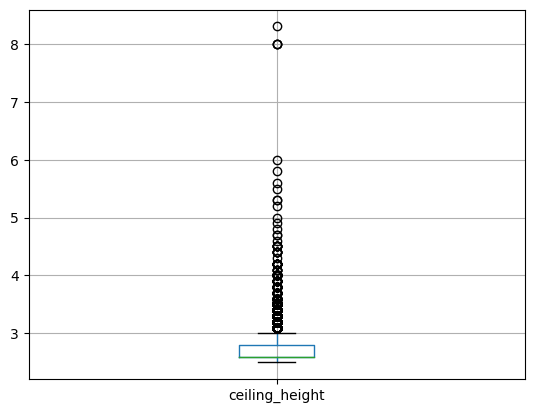

In [88]:
data.boxplot(column='ceiling_height');

Квартиры с потолками больше 4.2 м - выбросы.

##### Этаж квартиры

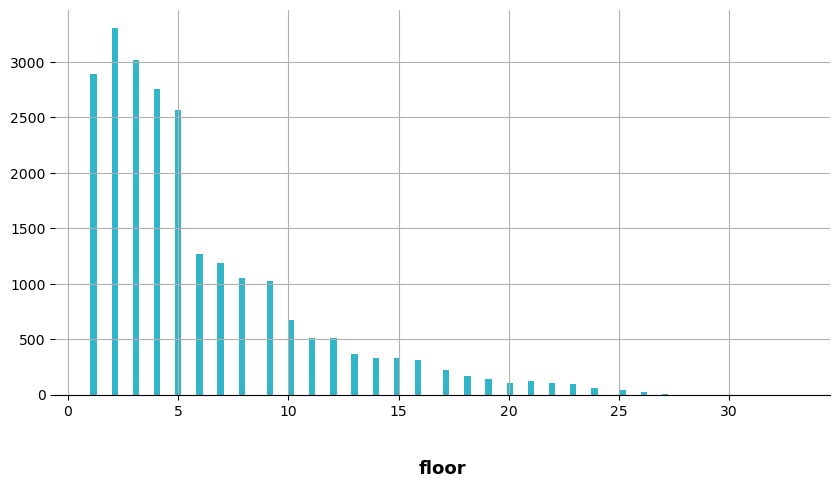

In [89]:
hist7 = hist('floor')

На графике видно, что бОльшим спросом пользуются квартиры со второго по пятый этажи, но на графике виден резкий спад после пятого этажа - вероятнее всего это происходит из-за существования на рынке жилья квартирных домов различных категорий. Имеется в виду, что для более точного анализа необходимо выделить объекты: пятиэтажки, девятиэтажки, семнадцатиэтажные дома, двадцатипяти этажные дома, небоскребы и т.д. Но руководствуясь этими данными и держа в уме приблизительную категоризацию жилых домов, можно сделать вывод, что все же квартиры на нижних этажах от 2-го до 9-го наиболее привликательны для покупателей, поэтому предложений с ними больше.

In [90]:
data['floor'].describe()

count    23179.000000
mean         5.867509
std          4.874781
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

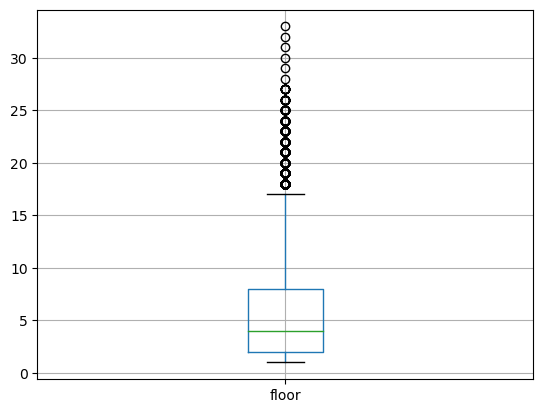

In [91]:
data.boxplot(column='floor');

Выбросами считаются квартиры выше 12 этажа.

##### Тип этажа квартиры

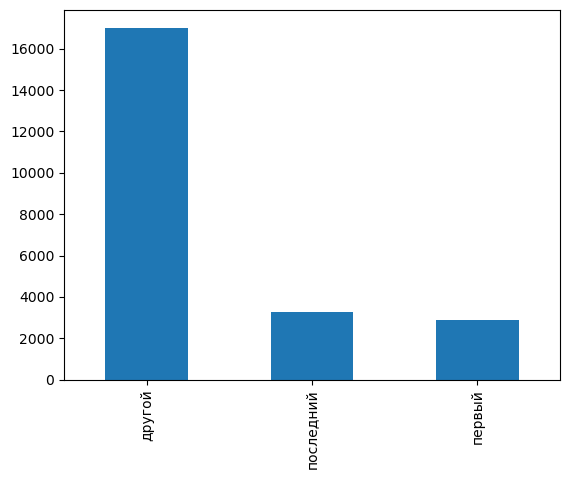

In [92]:
hist8 = data['floor_type'].value_counts().plot.bar()

График показывает, что первый и последний этажи пользуются наименьшим спросом у покупателей, что вполне логично: на первом этаже не хочется, чтобы тебе заглядывали в окна, а жители последних этажей чаще всего сталкиваются с проблемами протечки крыши.

##### Общее количество этажей в дома

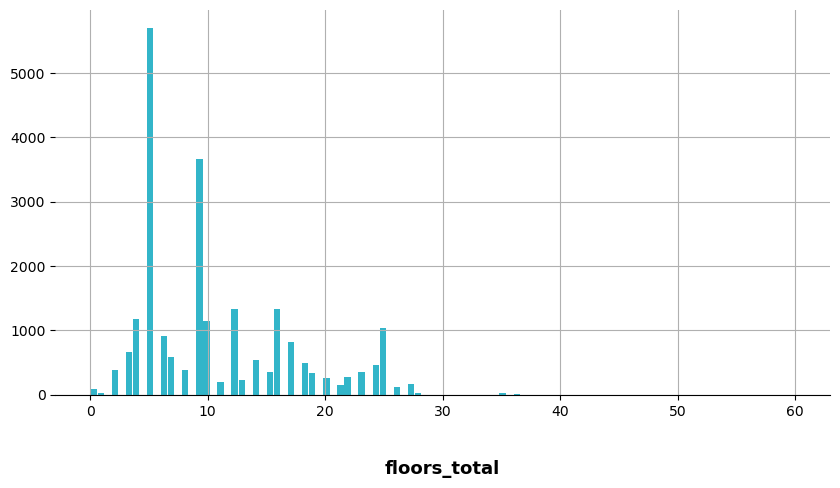

In [93]:
hist9 = hist('floors_total')

Примечательно, что пятиэтажные и девятиэтажные дома - имеют наибольшее количество объявлений о продаже квартир, чем любая другая этажность дома. Скорее всего это связано с массовостью построек данных типов объектов. Люди доверяют застройкам навека, но и современным застройщикам, которые уже построили достаточно жилых комплексов и ввели их в эксплуатацию - 16-этажные и 25-этажные дома тоже пользуются спросом.

In [94]:
data['floors_total'].describe()

count    23179.000000
mean        10.605117
std          6.615067
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

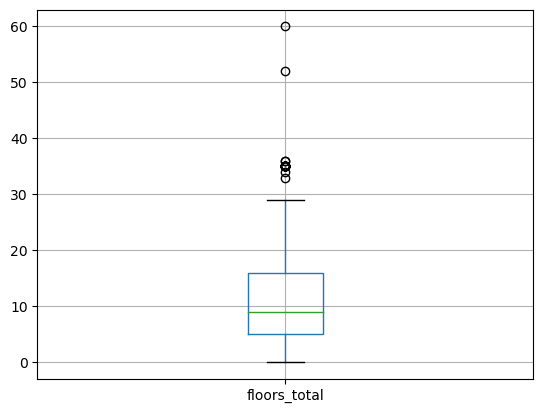

In [95]:
data.boxplot(column='floors_total');

Квартиры выше 30 этажа - выбросы.

##### Расстояние до центра города в метрах

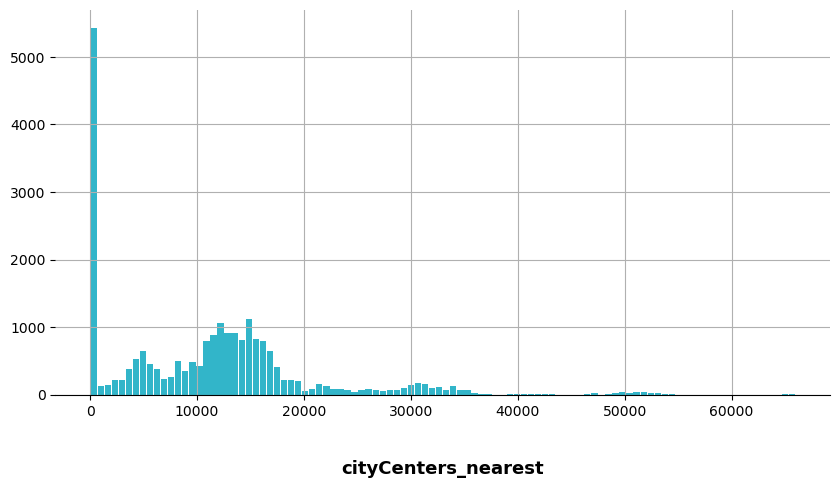

In [96]:
hist10 = hist('cityCenters_nearest')

Учитывая тот факт, что в данном критерии достаточное количество пропусков, рассмотрим часть графика, котора идет после 0.

Чем ближе к центру, тем дороже и уникальнее квартира, соответственно, таких объявлений достаточно, но меньше, чем тех, где квартиры находятся в "спальных" районах - что и отображено на графике: в промежутке от 2 до 15 км количество объявлений самое большое. Дальше 20 км в основном уже пригород, поэтому количество объявленией меньше и связано это только с тем, что близлежащие города существенно меньше Санкт-Петербурга.

In [97]:
data['cityCenters_nearest'].describe()

count    23179.000000
mean     10880.142629
std       9644.341017
min          0.000000
25%       2256.000000
50%      11228.000000
75%      15245.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

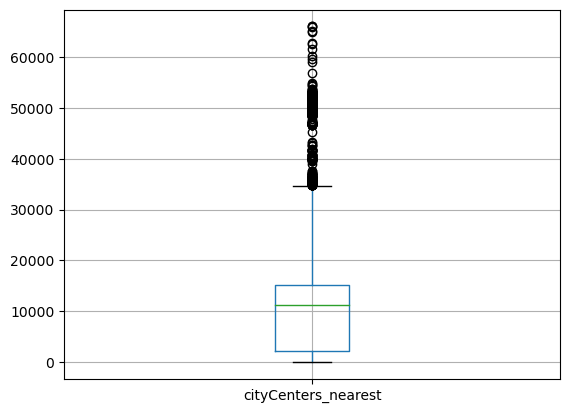

In [98]:
data.boxplot(column='cityCenters_nearest');

##### Расстояние до ближайшего аэропорта

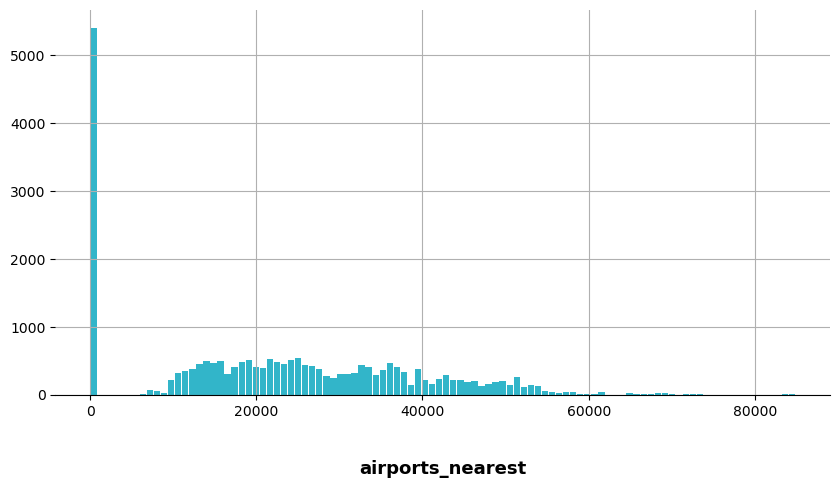

In [99]:
hist11 = hist('airports_nearest')

Учитывая тот факт, что в данном критерии достаточное количество пропусков, рассмотрим часть графика, котора идет после 0.

График показывает, что публикаций в среднем одинаковое количество на любом расстоянии больше 10 км от аэропорта. Большинству жителей не так важно, близко ли находится аэропорт. Это необходимо тем людям, которые работают в аэропроту, но их количество низкое по сравнению с остальными клиентами.

In [100]:
data['airports_nearest'].describe()

count    23179.000000
mean     22066.664394
std      16445.001153
min          0.000000
25%      10275.000000
50%      21871.000000
75%      34302.000000
max      84869.000000
Name: airports_nearest, dtype: float64

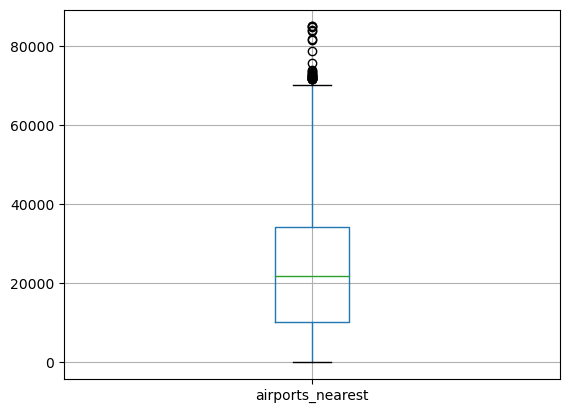

In [101]:
data.boxplot(column='airports_nearest');

##### Расстояние до ближайшего парка

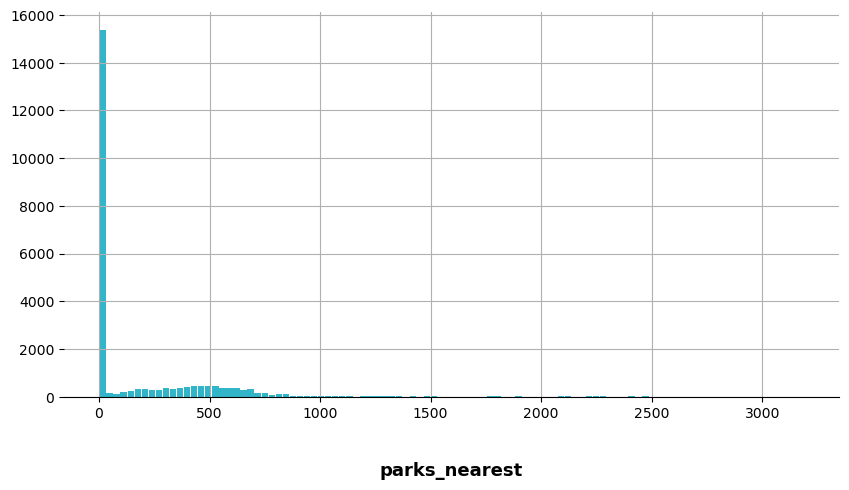

In [102]:
hist12 = hist('parks_nearest')

Учитывая тот факт, что в данном критерии достаточное количество пропусков, рассмотрим часть графика, котора идет после 0.

Судя по графику, в основном от жилого объекта до ближайшего парка идти меньше 1 км, это связано с тем, что парком могут считать и сквер рядом с жильем, и будущий парк в новом строящемся жилом комплекте, поэтому стараются указывать все преимущества объекта на продажу, указывая, что до парка недалеко идти.

In [103]:
data['parks_nearest'].describe()

count    23179.000000
mean       167.024462
std        306.473700
min          0.000000
25%          0.000000
50%          0.000000
75%        300.500000
max       3190.000000
Name: parks_nearest, dtype: float64

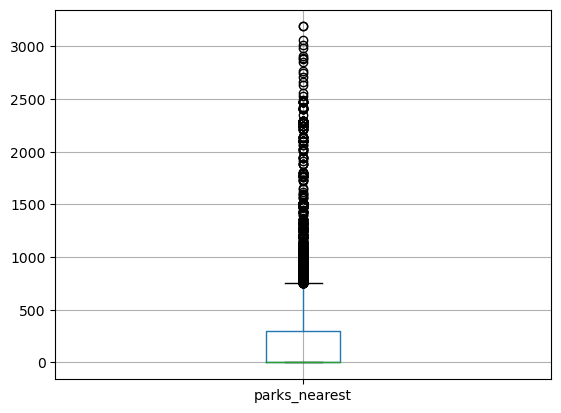

In [104]:
data.boxplot(column='parks_nearest');

##### День публикации объявления

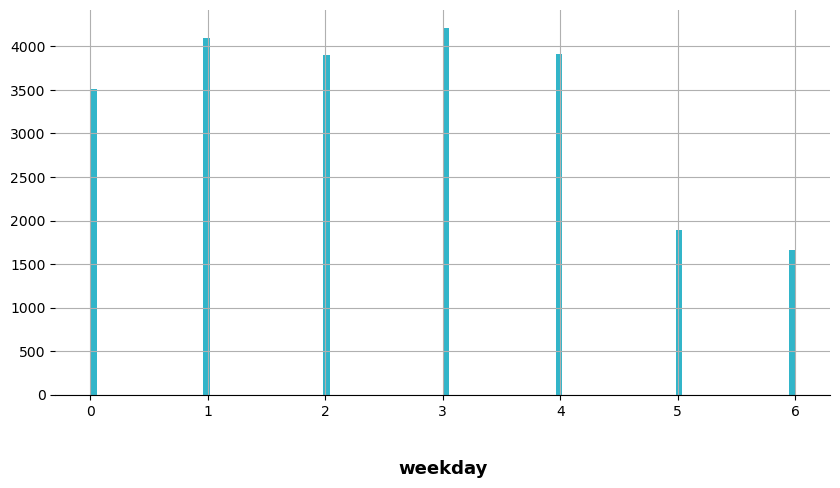

In [105]:
hist13 = hist('weekday')

Публикаций, которые были сделаны в субботу и воскресенье, наименьшее число, чем по всем остальным дням недели. Скорее всего это может быть связано с тем, что в основном жилье стараются продавать через риелторов, которые работают в стандартном графике с понедельника по пятницу, поэтому объявления выставляют именно в этом диапазоне времени.

In [106]:
data['weekday'].describe()

count    23179.000000
mean         2.571293
std          1.786843
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

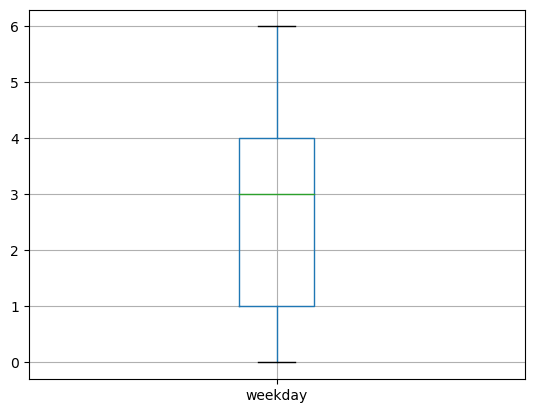

In [107]:
data.boxplot(column='weekday');

##### Месяц публикации объявления

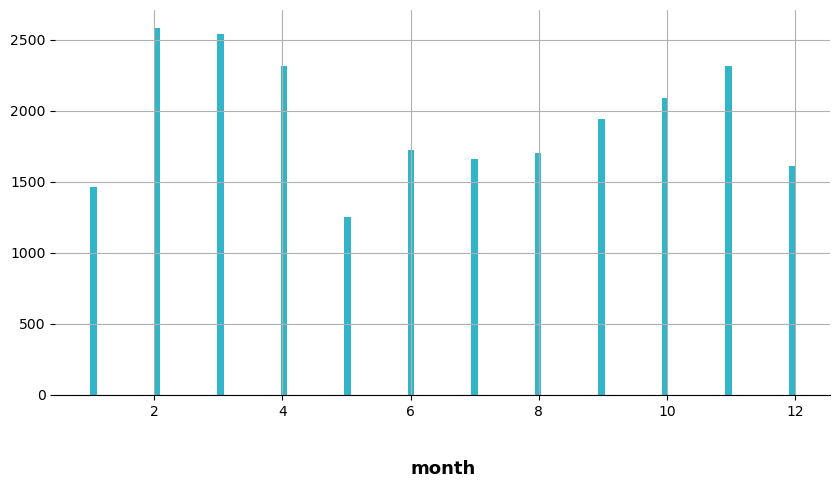

In [108]:
hist14 = hist('month')

Месяц публикации объявления тоже интересен к сравнению, в январе, в мае - наименее дешевые квартиры, чем в остальные месяцы. Сезонность тоже влияет на рынок жилья. Зимой считается мертвый сезон, потому что - праздники, рынок оживает в феврале, что и отображено на графике. В январе скорее всего допродаются квартиры, которые не были проданы осенью. Майкие праздники оказывают аналогичное влияние, поэтому мы видим провал. Интерес покупателей повышается ровно после праздников, но лето - период отпусков, и мы видим на графике, что число объявлений среднее. Пик - осень, когда люди после отпусков находят время на поиск квартиры, спрос на них растет, соответственно, растет и цена на жилье, появляется большое количество предложений.

In [109]:
data['month'].describe()

count    23179.000000
mean         6.402606
std          3.491684
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

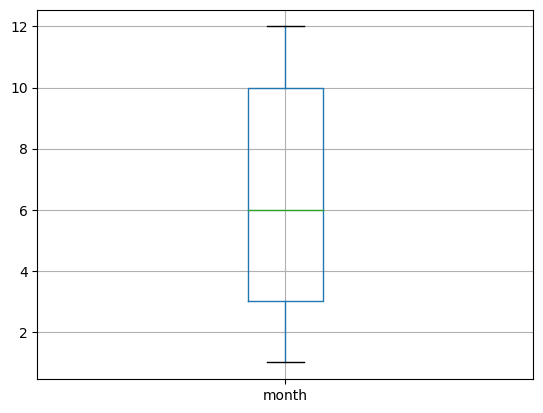

In [110]:
data.boxplot(column='month');

##### Год публикации объявления

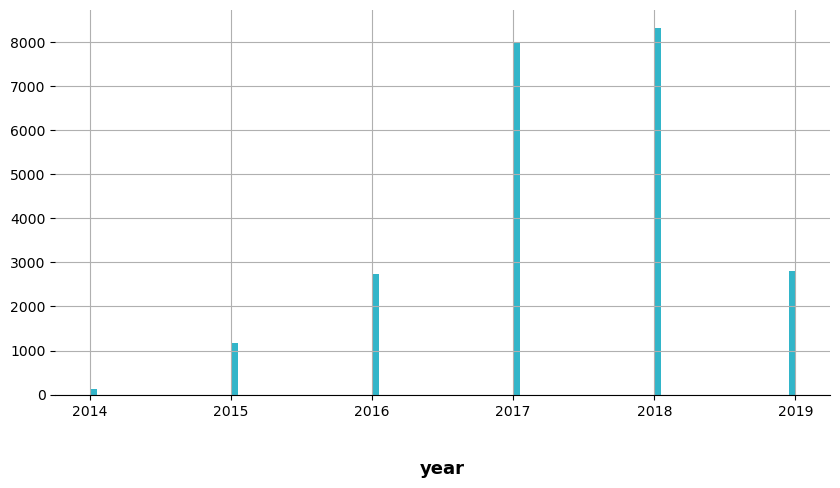

In [111]:
hist15 = hist('year')

В 2014-2016 годах достаточно низкое количество публикаций объектов, что может быть связано с кризисом в 2014-2015хх годах. Далее мы видим рост и резкий спад в 2019 году. Возможно, это связано с нововведенем - обязательное использование застройщиком эксроу-счетов. Из-за этих изменений люди скупали недвижимость еще в 2018 году, поэтому мы и видим резкий спад.

In [112]:
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23179, dtype: int64

In [113]:
data['year'].describe()

count    23179.000000
mean      2017.363778
std          1.040317
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

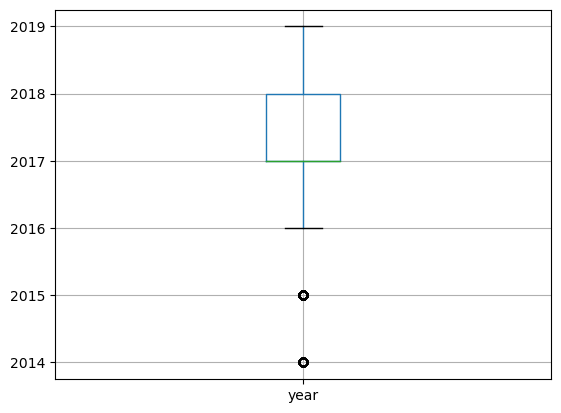

In [114]:
data.boxplot(column='year');

#### Промежуточный вывод

Построенные гистограммы дали возможность детальнее разобраться в датафрейме. На их основе можно сделать предварительные выводы о самых популярных квартирах на продажу:

- общая площадь квартиры составляет от 40 до 70 кв.м.
- жилая площадь квартиры - от 18 до 42 кв.м.
- кухня в данных объектах составляет от 12 до 20 кв.м.
- стоимость жилового объекта варьируется от 3.4. млн до 6.75 млн
- однокомнатных и студий больше всего в продаже, следом за ними двухкомнатные и трехкомнатные квартиры
- 2.6 м - самая популярная высота потолков
- квартиры на этажах от 2-го до 9-го - пользуются большим спросом
- в то время как первый и последний этажи продаются меньше, чем квартир на любых других этажах
- пятиэтажки и девятиэтажки пользуются большим спросом, чем все остальные дома
- большинство объявлений о продаже жилья находятся на расстоянии от центра от 2 до 15 км.
- расстояние до аэропорта в целом не влияет на спрос на жилье
- расстояние до парка в среднем у всех одинаковое - до 1 км
- публикаций, сделанные в будни, гораздо больше, чем тех, которые сделаны в выходные
- сезонность - важный фактор, который влияет на количество публикаций о продаже квартир: больше всего квартир продаются весной и осенью
- больше всего было сделок о продаже квартир в 2017-2018хх годах.

#### Определим, с какой скоростью продавались квартиры

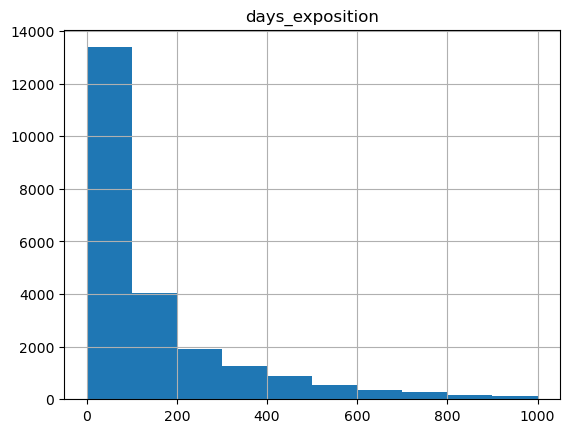

In [115]:
data.hist('days_exposition', range=(0,1000)); #построим гистограмму по столбцу days_exposition

In [116]:
data['days_exposition'].describe()

count    23179.000000
mean       156.885068
std        213.911178
min          0.000000
25%         23.000000
50%         74.000000
75%        199.000000
max       1572.000000
Name: days_exposition, dtype: float64

Медиана - 75 дней, среднее значенине 159 дней. Судя по гистограмме, бОльшее количество квартир было продано меньше, чем за 25 дней - проверим.

In [117]:
days_pivot = pd.pivot_table(data,
                           index = 'rooms',
                           values='days_exposition',
                           aggfunc={'count', 'min', 'max', 'mean', 'median'})
days_pivot

,count,max,mean,median,min
rooms,,,,,
0,197,931,101.421320,45.0,0
1,7987,1512,143.584074,66.0,0
2,7750,1572,151.291484,72.0,0
3,5565,1553,169.904223,84.0,0
4,1159,1512,204.350302,103.0,0
5,326,1395,236.748466,107.5,0
6,105,1350,201.066667,90.0,0
7,59,781,124.135593,35.0,0
8,12,921,358.500000,241.5,0


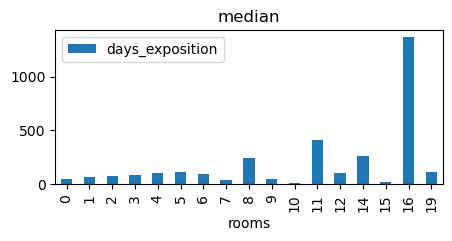

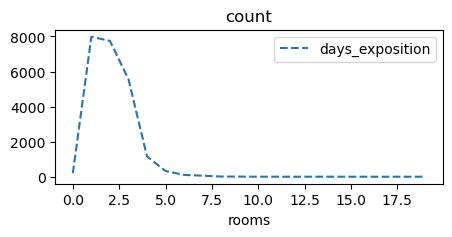

In [118]:
# построим графики на основе дней публикации и количества комнат.
days_pivot_median = pd.pivot_table(data,
                           index = 'rooms',
                           values='days_exposition',
                           aggfunc='median')
days_pivot_count = pd.pivot_table(data,
                           index = 'rooms',
                           values='days_exposition',
                           aggfunc='count')

days_pivot_median.plot(figsize=(5,2), kind='bar',  title='median')
days_pivot_count.plot(figsize=(5,2), linestyle='--', title='count')
plt.show()

Видим, что наибольшая выборка приходится на квартиры с количеством комнат до 6, сделаем соответствующий срез датафрейма и проанализируем:

In [119]:
data_rooms = data.query('1 <= rooms <= 6')
data_rooms.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year,price_per_sq_m,weekday,month,floor_type
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,482,2,755,0,16.0,2019,120370,3,3,другой
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,0,0,0,81,19.0,2018,82920,1,12,первый
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,90,2,574,558,14.0,2015,92785,3,8,другой
3,0,64900000,159.0,2015-07-24,3,3.0,14,NaN,9,NaN,...,84,3,234,424,7.0,2015,408176,4,7,другой
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,112,1,48,121,8.0,2018,100000,1,6,другой


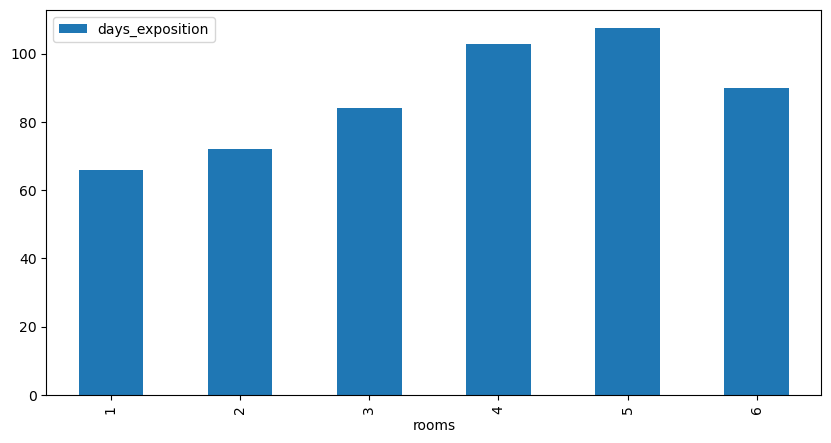

In [120]:
# посмотрим снова на распределение медианного значения дня публикации относительно количества комнат
days_pivot_median = pd.pivot_table(data_rooms,
                           index = 'rooms',
                           values='days_exposition',
                           aggfunc='median')
days_pivot_median.plot(figsize=(10,5), kind='bar')
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)
Среднее время на продажу по 1 - комнатной квартире составляет 126.5
Долгими продажами можно считать продажи за следующее количество дней:  273.8
Быстрыми продажами можно считать продажи за следующее количество дней:  0


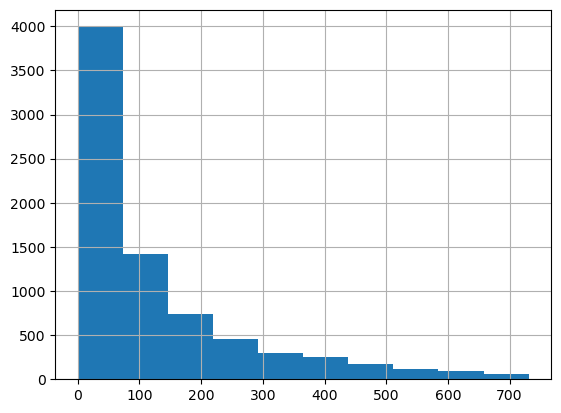

In [121]:
# на основе среза данных построим графики и выявим сколько времени обычно занимает продажа
# какие продажи можно считать долгими, какие - быстрыми
def func(n_rooms):
    new_data = data.loc[data['rooms'] == n_rooms]
    end = int(round((new_data['rooms'].shape[0])*0.975, 0))
    start = int(round((new_data['rooms'].shape[0])*0.025, 0))
    new_data = new_data.sort_values(by='days_exposition')
    new_data = new_data.reset_index(drop=True)
    new_data = new_data.iloc[start:end]
    b = round(new_data['days_exposition'].mean(),1)
    c = round(new_data['days_exposition'].median(),1)
    d = round(new_data['days_exposition'].mean() + new_data['days_exposition'].std(),1)
    e = round(new_data['days_exposition'].mean() - new_data['days_exposition'].std(),1)
    if e < 0:
        e = new_data['days_exposition'].min()
    print(new_data['days_exposition'].hist())
    print('Среднее время на продажу по', n_rooms, '- комнатной квартире составляет', b)
    print('Долгими продажами можно считать продажи за следующее количество дней: ', d)
    print('Быстрыми продажами можно считать продажи за следующее количество дней: ', e)

func(1)

AxesSubplot(0.125,0.11;0.775x0.77)
Среднее время на продажу по 2 - комнатной квартире составляет 132.5
Долгими продажами можно считать продажи за следующее количество дней:  287.7
Быстрыми продажами можно считать продажи за следующее количество дней:  0


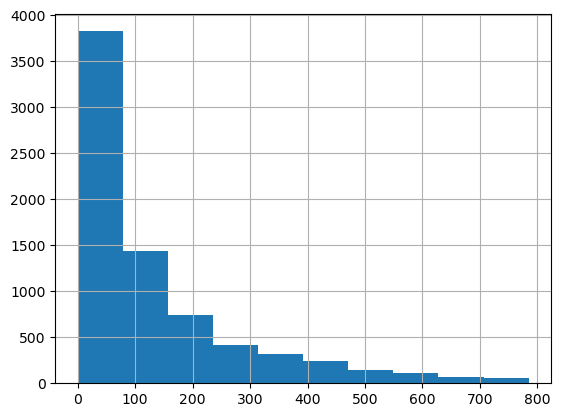

In [122]:
func(2)

AxesSubplot(0.125,0.11;0.775x0.77)
Среднее время на продажу по 3 - комнатной квартире составляет 150.9
Долгими продажами можно считать продажи за следующее количество дней:  329.5
Быстрыми продажами можно считать продажи за следующее количество дней:  0


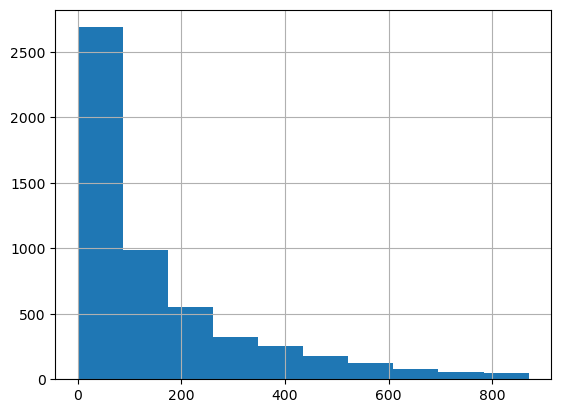

In [123]:
func(3)

AxesSubplot(0.125,0.11;0.775x0.77)
Среднее время на продажу по 4 - комнатной квартире составляет 184.2
Долгими продажами можно считать продажи за следующее количество дней:  396.3
Быстрыми продажами можно считать продажи за следующее количество дней:  0


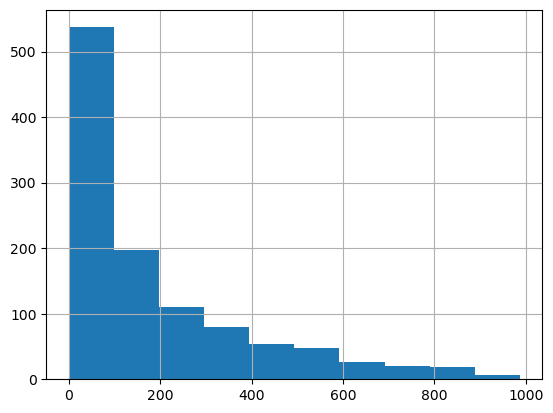

In [124]:
func(4)

AxesSubplot(0.125,0.11;0.775x0.77)
Среднее время на продажу по 5 - комнатной квартире составляет 216.6
Долгими продажами можно считать продажи за следующее количество дней:  474.2
Быстрыми продажами можно считать продажи за следующее количество дней:  0


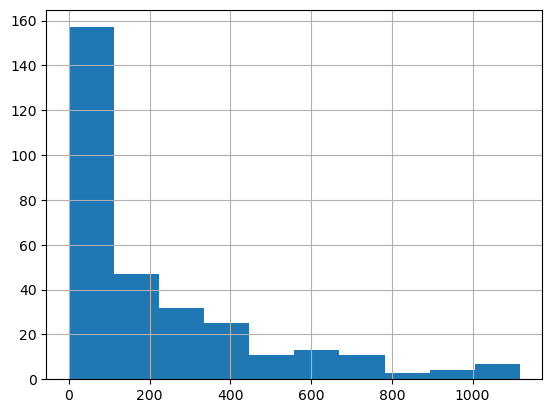

In [125]:
func(5)

AxesSubplot(0.125,0.11;0.775x0.77)
Среднее время на продажу по 6 - комнатной квартире составляет 180.3
Долгими продажами можно считать продажи за следующее количество дней:  387.0
Быстрыми продажами можно считать продажи за следующее количество дней:  0


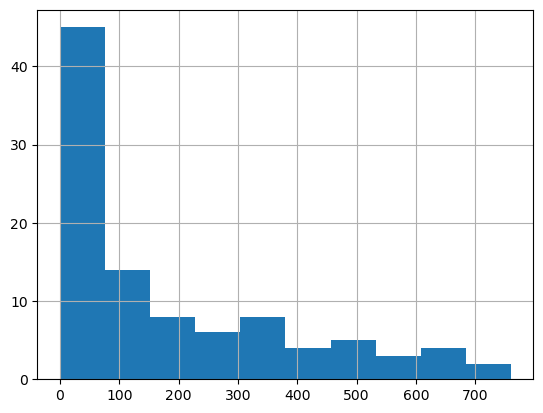

In [126]:
func(6)

#### Промежуточный вывод

Быстрыми для всех можно считать продажи за 1 день, особо долго продаются 5-ти комнатные квартиры: 474 дней. В среднем продажа квартиры занимает от 3-х до 6-ти месяцев.

#### Факторы, влияющие на общую стоимость объекта

##### Общая площадь

In [127]:
# ограничим датафрейм - оставим необходимые для исследования столбцы
data_n = data.loc[:, ['last_price', 'total_area', 'living_area', 'kitchen_area', \
                           'rooms', 'floor_type', 'weekday', 'month', 'year', \
                           'price_per_sq_m']]
data_n.head()

,last_price,total_area,living_area,kitchen_area,rooms,floor_type,weekday,month,year,price_per_sq_m
0,13000000,108.0,51.0,25.0,3,другой,3,3,2019,120370
1,3350000,40.4,18.6,11.0,1,первый,1,12,2018,82920
2,5196000,56.0,34.3,8.3,2,другой,3,8,2015,92785
3,64900000,159.0,NaN,NaN,3,другой,4,7,2015,408176
4,10000000,100.0,32.0,41.0,2,другой,1,6,2018,100000


In [128]:
# посмотрим матрицу корреляции для каждого столбца
corr = round(data_n.corr(), 2)
corr

,last_price,total_area,living_area,kitchen_area,rooms,weekday,month,year,price_per_sq_m
last_price,1.00,0.65,0.57,0.52,0.37,0.00,0.00,-0.04,0.74
total_area,0.65,1.00,0.94,0.61,0.76,-0.00,0.01,-0.08,0.31
living_area,0.57,0.94,1.00,0.43,0.85,-0.01,-0.00,-0.07,0.23
kitchen_area,0.52,0.61,0.43,1.00,0.27,-0.01,0.00,-0.06,0.40
rooms,0.37,0.76,0.85,0.27,1.00,-0.00,-0.00,-0.06,0.06
weekday,0.00,-0.00,-0.01,-0.01,-0.00,1.00,0.01,-0.00,-0.01
month,0.00,0.01,-0.00,0.00,-0.00,0.01,1.00,-0.27,-0.00
year,-0.04,-0.08,-0.07,-0.06,-0.06,-0.00,-0.27,1.00,0.01
price_per_sq_m,0.74,0.31,0.23,0.40,0.06,-0.01,-0.00,0.01,1.00


In [129]:
# подсветим данные по корреляции для визуального удобства
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,last_price,total_area,living_area,kitchen_area,rooms,weekday,month,year,price_per_sq_m
last_price,1.00,0.65,0.57,0.52,0.37,0.00,0.00,-0.04,0.74
total_area,0.65,1.00,0.94,0.61,0.76,-0.00,0.01,-0.08,0.31
living_area,0.57,0.94,1.00,0.43,0.85,-0.01,-0.00,-0.07,0.23
kitchen_area,0.52,0.61,0.43,1.00,0.27,-0.01,0.00,-0.06,0.40
rooms,0.37,0.76,0.85,0.27,1.00,-0.00,-0.00,-0.06,0.06
weekday,0.00,-0.00,-0.01,-0.01,-0.00,1.00,0.01,-0.00,-0.01
month,0.00,0.01,-0.00,0.00,-0.00,0.01,1.00,-0.27,-0.00
year,-0.04,-0.08,-0.07,-0.06,-0.06,-0.00,-0.27,1.00,0.01
price_per_sq_m,0.74,0.31,0.23,0.40,0.06,-0.01,-0.00,0.01,1.00


Корреляция равна  0.6543189906732362


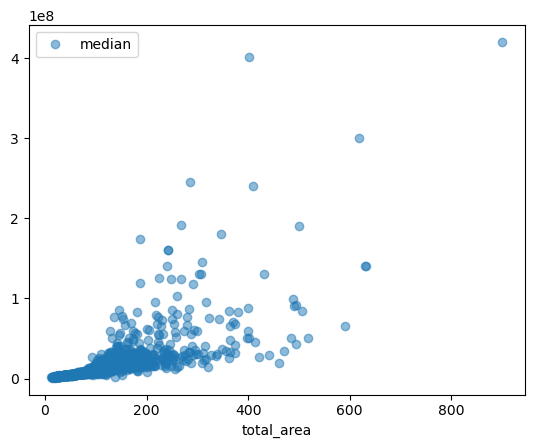

In [130]:
# создадим функцию, которая выводит сводные таблицы для каждого столбца
# и сразу рассмотрим, как на общую стоимость объекта влияет общая площадь
def data_pivot(data_n, aggr_index, vls, f1):
    data_pivot = data_n.pivot_table(
        index = [aggr_index], 
        values = vls,
        aggfunc = {f1})
    data_pivot = data_pivot.sort_values(by=f1, ascending=True)
    return data_pivot

corr_data1 = data_pivot(data, 'total_area', 'last_price', 'median')
corr_data1.plot(y='median', style='o', alpha=0.5);
print('Корреляция равна ', data['total_area'].corr(data['last_price']))

Корреляция в 0.65 говорит о наличии связи, однако не слишком сильной. Выходит, что увеличение общей площади объекта сопровождается увеличением цены на него.

##### Жилая площадь

Корреляция равна  0.5691646759827599


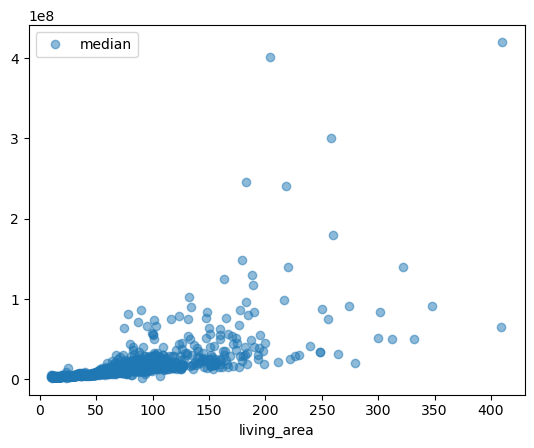

In [131]:
corr_data2 = data_pivot(data, 'living_area', 'last_price', 'median')
corr_data2.plot(y='median', style='o', alpha=0.5);
print('Корреляция равна ', data['living_area'].corr(data['last_price']))

Корреляция в 0.56 также говорит о наличии несильной связи. Увеличение жилой площади объекта сопровождается увеличением цены на него.

##### Площадь кухни

Корреляция равна  0.5215126965680205


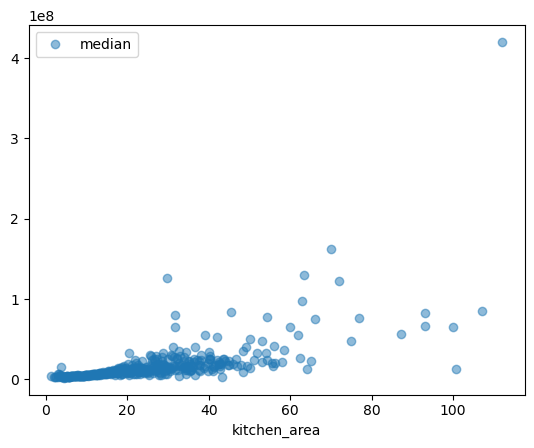

In [132]:
corr_data3 = data_pivot(data, 'kitchen_area', 'last_price', 'median')
corr_data3.plot(y='median', style='o', alpha=0.5);
print('Корреляция равна ', data['kitchen_area'].corr(data['last_price']))

Корреляция равна 0.52 - несильная связь между площадью кухни и стоимостью жилья, также при увеличении площади кухни - стоимость на объект увеличивается.

##### Количество комнат

Корреляция равна  0.36538382276765213


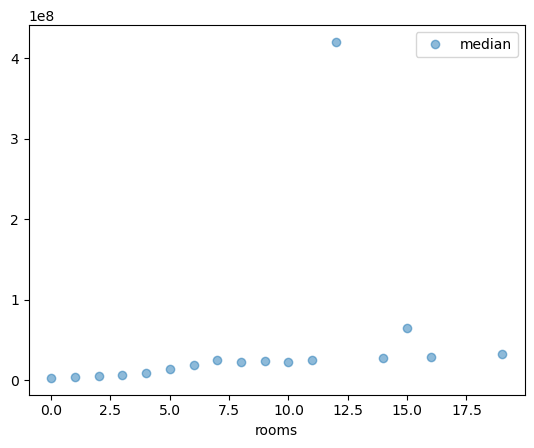

In [133]:
corr_data4 = data_pivot(data, 'rooms', 'last_price', 'median')
corr_data4.plot(y='median', style='o', alpha=0.5);
print('Корреляция равна ', data['rooms'].corr(data['last_price']))

Корреляция 0.37 - ниже, чем у других уже исследованных факторах. Количество комнат слабо влияет на стоимость жилья - при увеличении комнат, стоимость по прежнему увеличивается.

##### Тип этажа, на котором расположена квартира (первый, последний, другой)

,median
floor_type,
первый,3900000.0
последний,4300000.0
другой,4800000.0


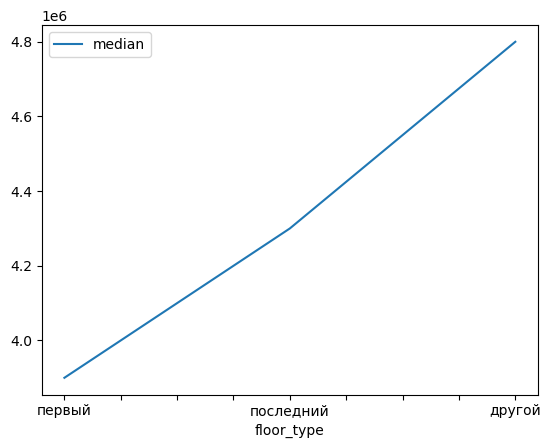

In [134]:
corr_data5 = data_pivot(data, 'floor_type', 'last_price', 'median')
corr_data5.plot(y='median');
corr_data5

Цена на первый этаж - самая низкая, разница между медианой стоимости квартиры на первом и последнем этажах 400.000.

##### Дата размещения объявления (день недели, месяц, год)

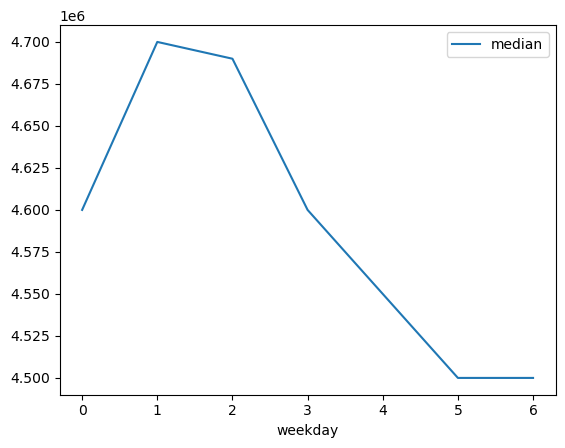

In [135]:
corr_data6 = data_pivot(data, 'weekday', 'last_price', 'median')
corr_data6 = corr_data6.sort_values(by='weekday', ascending=True)
corr_data6.plot(y='median');

График показывает, что объявления, выставленные ближе к выходным имеют самую низкую стоимость жилья, попытаемся понять, почему так происходит. Возможно, в будни дни выставляются объявления о продаже квартир с бОльшей площадью, чем в выходные. А в выходные выставляют, например, студии. Проверим нашу теорию, построив такой же график, только не беря во внимание полную стоимость жилья, а стоимость за 1 квадратный метр, а затем посмотрим, как зависит день продажи от площади квартиры.

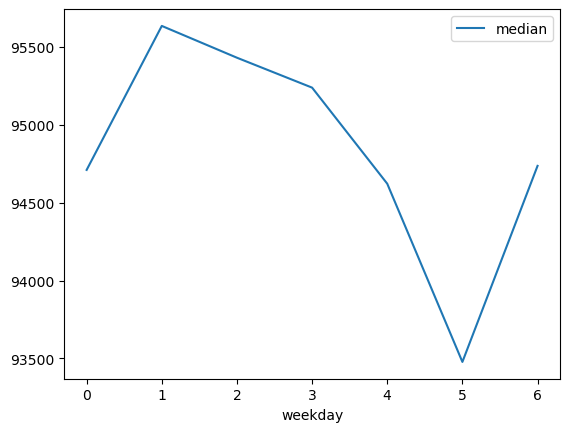

In [136]:
corr_data6_1 = data_pivot(data, 'weekday', 'price_per_sq_m', 'median')
corr_data6_1 = corr_data6_1.sort_values(by='weekday', ascending=True)
corr_data6_1.plot(y='median');

Видим, что спад по сути незначительный - разница в цене за 1 кв.м. всего примерно в 2,5 тысячи.

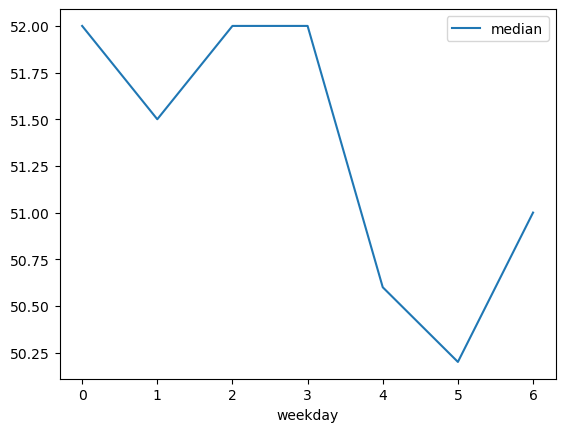

In [137]:
corr_data6_2 = data_pivot(data, 'weekday', 'total_area', 'median')
corr_data6_2 = corr_data6_2.sort_values(by='weekday', ascending=True)
corr_data6_2.plot(y='median');

И при этом выставляются на продажу примерно одинаковой площади квартиры с разницей в 2 кв.м.

Делаем вывод, что зависимость цены жилья от дня недели незначительная.

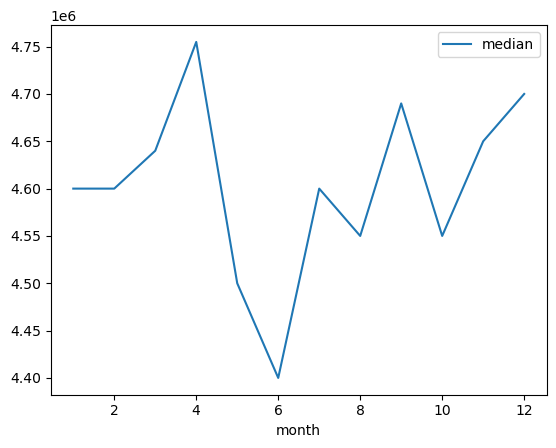

In [138]:
corr_data7 = data_pivot(data, 'month', 'last_price', 'median')
corr_data7 = corr_data7.sort_values(by='month', ascending=True)
corr_data7.plot(y='median');

Что касается месяца публикации, то видим на графике выше, что полная стоимость квартиры существенно ниже в июне по сравнению с остальными месяцами, также наблюдаем спад в стоимости жилья в августе, октябре и январе. Вероятнее всего это связано с сезонностью, описанной выше. Но для уточнения этой гипотезы построим аналогичные графики с зависимостью месяца публикации между ценой за 1кв.м. и площадью жилья.

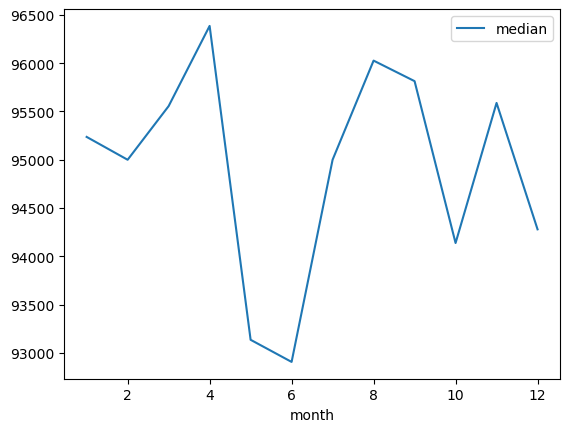

In [139]:
corr_data7_1 = data_pivot(data, 'month', 'price_per_sq_m', 'median')
corr_data7_1 = corr_data7_1.sort_values(by='month', ascending=True)
corr_data7_1.plot(y='median');

График показывает, что медианная стоимость жилья за 1 кв.м. в июне незначительно ниже стоимости жилья, которые выставлялись на продажу в другие месяцы года, если сравнивать с самым большим пиком, то всего примерно на 3.500 ниже.

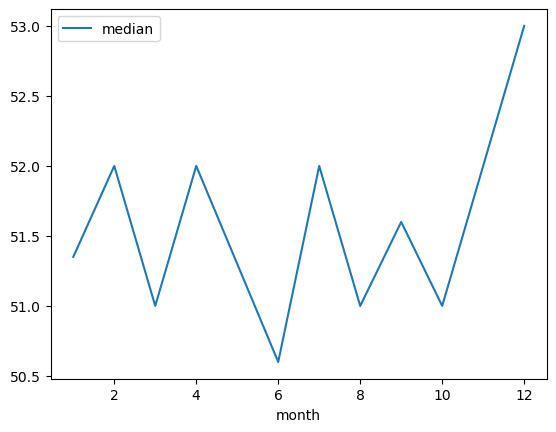

In [140]:
corr_data7_2 = data_pivot(data, 'month', 'total_area', 'median')
corr_data7_2 = corr_data7_2.sort_values(by='month', ascending=True)
corr_data7_2.plot(y='median');

На графике выше квартиры выставляются на продажу с одинаковой в среднем площадью в течение всего года - примерно 52 кв.м., делаем вывод, что также зависимость между полной стоимостью и месяцем публикации незначительная.

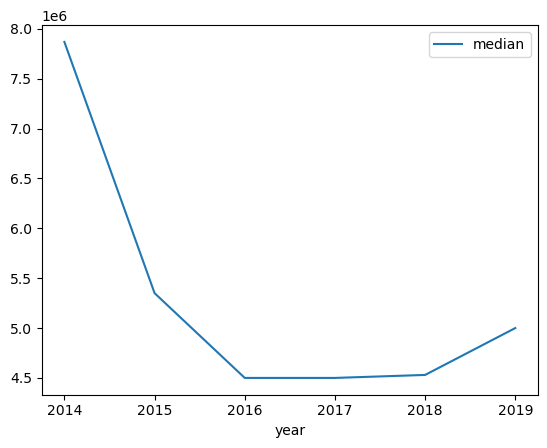

In [141]:
corr_data8 = data_pivot(data, 'year', 'last_price', 'median')
corr_data8 = corr_data8.sort_values(by='year', ascending=True)
corr_data8.plot(y='median');

Рассмотрим, как влияет год публикации на стоимость жилья: в 2014 году она была самой дорогой, в 2016 произошел резкий спад, который протянулся до 2018 года, а в 2019 году стоимость жилья стала увеличиваться. Прежде чем связывать это с экономическими кризисами или с другими факторами, убедимся в том, что зависимость правда существует.

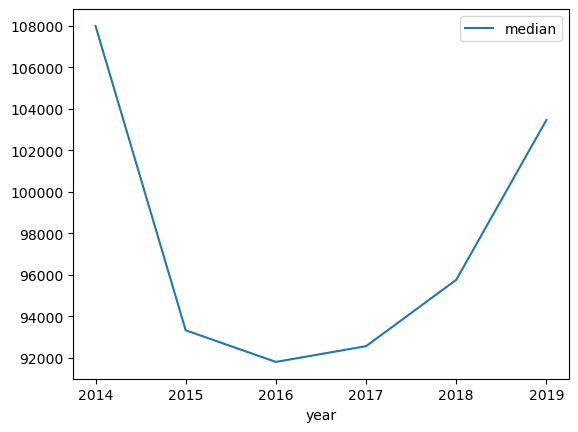

In [142]:
corr_data8_1 = data_pivot(data, 'year', 'price_per_sq_m', 'median')
corr_data8_1 = corr_data8_1.sort_values(by='year', ascending=True)
corr_data8_1.plot(y='median');

Исходя из графика зависимости года публикации и цены за 1 кв.м. видим, что в 2014 году цена за 1 кв.м. составляла 108.000, затем резко упала на примерно 15.000, а в 2019 году увеличилась аж на 8.000 по сравнению с 2018 годом. Совсем незначительные суммы в рамках стоимости жилья.

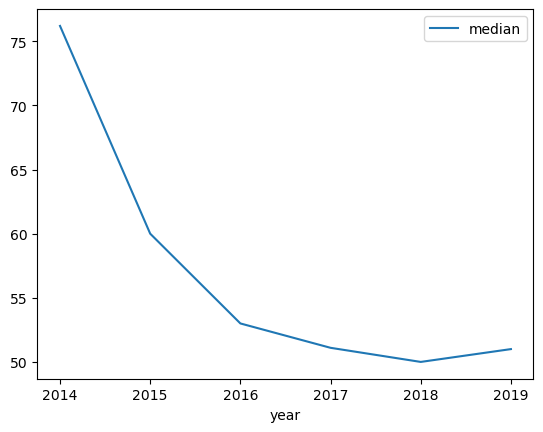

In [143]:
corr_data8_2 = data_pivot(data, 'year', 'total_area', 'median')
corr_data8_2 = corr_data8_2.sort_values(by='year', ascending=True)
corr_data8_2.plot(y='median');

В 2014 году выставляли на продажу квартиры площадью немного больше 75 кв.м., затем площадь снижалась до 2018 года - медианная площадь примерно 50 кв.м. Значит, что в 2014 году, продавались большие и, как следствие, дорогие квартиры, затем начали выставляться квартиры с меньшей площадью, что и отображено на графике - разкий спад, так как квартиры стали в среднем дешевле. Вероятнее всего это связано с тем, что в начале работы платформы был большой приток риелторов, которые тестировали платформу, а в основном риелторы занимаются более крупными объектами.

#### Промежуточный вывод

Из рассмотренных факторов, общая площадь объекта, жилая площадь и площадь кухни больше всего влияют на общую стоимость жилья. Меньше всего влияет количество комнат, а день недели, месяц публикации не влияют на стоимость объекта. В то время как график зависимости года публикации показал, что стоимость жилья в начале работы платформы была выше, чем в остальные года.

#### Средняя цена одного квардартного метра в 10 населенных пунктах с наибольшим числом объявлений

In [144]:
data_top10 = pd.pivot_table(
    data,
    index='locality_name',
    values='price_per_sq_m',
    aggfunc={'count', 'mean'}
)
data_top10['mean'] = round(data_top10['mean'], 0)
data_top10 = data_top10.sort_values(by='count', ascending=False)
data_top10 = data_top10[:10]
data_top10

,count,mean
locality_name,,
Санкт-Петербург,15431,114804.0
Мурино,576,86186.0
Кудрово,464,95396.0
Шушары,432,78840.0
Всеволожск,384,68791.0
Пушкин,359,103025.0
Колпино,328,75383.0
Парголово,326,90206.0
Гатчина,297,68712.0


In [145]:
round(data_top10[data_top10['mean'] == data_top10['mean'].max()],0)

,count,mean
locality_name,,
Санкт-Петербург,15431,114804.0


In [146]:
round(data_top10[data_top10['mean'] == data_top10['mean'].min()],0)

,count,mean
locality_name,,
Выборг,233,58352.0


#### Промежуточный вывод

Самая высокая средняя стоимость жилья в Санкт-Петербурге - 114.746 - город-миллионник вне конкуренции, в то время как самая низкая стоимость жилья в Выборге - 58.352. Это можно объяснить годом постройки большинства объектов, удаленностью от Санкт-Петербурга, развитостью социальной инфраструктуры, наличием рабочих мест, и даже наличием мест для развлечений.

#### Определим, как стоимость объектов зависит от расстояния до центра города

In [147]:
data_sq = data.query('locality_name == "Санкт-Петербург"')
data_sq.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_new,year,price_per_sq_m,weekday,month,floor_type
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,482,2,755,0,16.0,2019,120370,3,3,другой
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,90,2,574,558,14.0,2015,92785,3,8,другой
3,0,64900000,159.0,2015-07-24,3,3.0,14,NaN,9,NaN,...,84,3,234,424,7.0,2015,408176,4,7,другой
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,112,1,48,121,8.0,2018,100000,1,6,другой
7,5,7915000,71.6,2019-04-18,2,2.6,24,NaN,22,NaN,...,0,0,0,0,12.0,2019,110544,3,4,другой


In [148]:
data_pivot_sq = pd.pivot_table(
    data_sq,
    index='cityCenters_nearest_new',
    values='price_per_sq_m',
    aggfunc='mean'
)
data_pivot_sq['price_per_sq_m'] = round(data_pivot_sq['price_per_sq_m'], 0)
data_pivot_sq

,price_per_sq_m
cityCenters_nearest_new,
0.0,245833.0
1.0,176640.0
2.0,156137.0
3.0,121299.0
4.0,132733.0
5.0,140249.0
6.0,150916.0
7.0,156387.0
8.0,124650.0


Корреляция равна  -0.31417328625802676


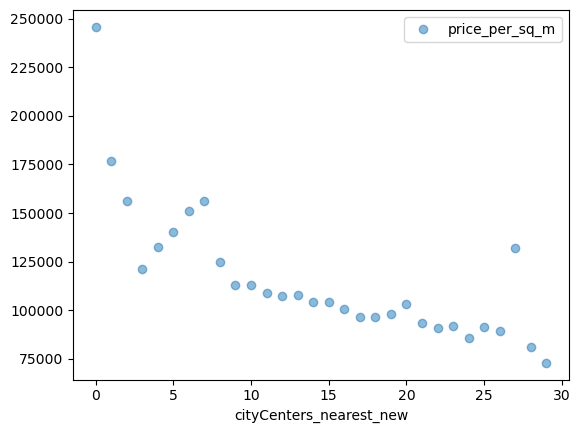

In [149]:
data_pivot_sq.plot(y='price_per_sq_m', style='o', alpha=0.5);
print('Корреляция равна ', (data_sq['cityCenters_nearest_new'].corr(data_sq['price_per_sq_m'])))

#### Промежуточный вывод

Корреляция составляет -0.31%. Удалясь от центра Санкт-Петербурга, стоимость квартиры снижается.
Примечателен тот факт, что у квартир, которые находятся на расстоянии от 3-х до 7 км от центра, видна обратная корреляция - увеличивается стоимость жилья. Объяснить это можно обустроенными кварталами и новыми ЖК.

### Общий вывод

В данном исследовании были поставлены и выполнены следующие задачи:
1. Изучена общая информация о датафрейме.
2. Найдены и обработаны пропущенные значения.
3. Изменены типы данных, где это необходимо.
4. Исправлены неявные дубликаты и устранены выбивающиеся значения в соответствующих столбцах.
5. Добавлены в датафрейм новые столбцы для последующего анализа.
6. Детально изучены большинство параметров объектов с построением гистограмм для каждого из них.
7. Изучена скорость продажи жилых объектов.
8. Построена матрица корреляции для некоторых параметров с целью изучить зависимость данных параметров на общую стоимость жилья.
9. Посчитана средняя цена одного квадратного метра в 10 населенных пунктах.
10. Определено, как стоимость объектов зависит от расстояния до центра города.

В результате исследовательского анализа данных можно сделать следующие итоговые выводы:

1. Предобработка данных - важный этап в анализе датафрейма, качественная обработка поможет наиболее корректно сделать выводы о текущей проблеме.
2. На основе датафрейма были изучены критерии объектов на продажу и выявлены наиболее популярные параметры продаваемого жилья:
- общая площадь квартиры составляет от 40 до 70 кв.м;
- жилая площадь квартиры - от 18 до 42 кв.м;
- кухня в данных объектах составляет от 12 до 20 кв.м;
- стоимость жилового объекта варьируется от 3.4. млн до 6.75 млн;
- однокомнатных и студий больше всего в продаже, следом за ними двухкомнатные и трехкомнатные квартиры
- 2.6 м - самая популярная высота потолков;
- квартиры на этажах от 2-го до 9-го - пользуются большим спросом;
- в то время как первый и последний этажи продаются меньше, чем квартир на любых других этажах;
- пятиэтажки и девятиэтажки пользуются большим спросом, чем все остальные дома;
- большинство объявлений о продаже жилья находятся на расстоянии от центра от 2 до 15 км;
- расстояние до аэропорта в целом не влияет на спрос на жилье;
- расстояние до парка в среднем у всех одинаковое - до 1 км;;
- публикаций, сделанные в будни, гораздо больше, чем тех, которые сделаны в выходные;
- сезонность - важный фактор, который влияет на количество публикаций о продаже квартир: больше всего квартир продаются весной и осенью;
- больше всего было сделок о продаже квартир в 2017-2018хх годах.

3. Была рассмотрена скорость продажи квартир, принимая во внимание комнатность объекта. По результатам исследования было выявлено, что быстрыми для всех продажами можно считать продажи за 1 день, долгими: 474 дней (5-ти комнатные квартиры). В среднем продажа квартиры занимает от 3-х до 6-ти месяцев.

4. Выявлено, как сильно оказывают влияние те или иные факторы на стоимость квартиры. Так, общая площадь объекта, жилая площадь и площадь кухни больше всего влияют на общую стоимость жилья. Меньше всего влияет количество комнат, а день недели, месяц публикации не влияют на стоимость объекта. В то время как график зависимости года публикации показал, что стоимость жилья в начале работы платформы была выше, чем в остальные года.

5. На основе данных о топ-10 населенных пунктов по наибольшему числу объявлений выявлено, что самая высокая средняя стоимость жилья в Санкт-Петербурге - 114.746, а самая низкая: в Выборге - 58.352.

6. Стоимость объектов зависит от расстояния до центра города, корреляция составляет -0.31%. Удалясь от центра Санкт-Петербурга, стоимость квартиры снижается. Примечателен тот факт, что у квартир, которые находятся на расстоянии от 3-х до 7 км от центра, видна обратная корреляция - увеличивается стоимость жилья. Объяснить это можно обустроенными кварталами и новыми ЖК.